# 1. Dataset and Problem Statement


## Problem a:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups 

In [2]:
c1_graphics = ['comp.graphics']
c1_misc = ['comp.os.ms-windows.misc']
c1_pc = ['comp.sys.ibm.pc.hardware']
c1_mac = ['comp.sys.mac.hardware']
c1_graphics_train = fetch_20newsgroups(subset = 'train', categories = c1_graphics, shuffle=True, random_state=42)
c1_misc_train = fetch_20newsgroups(subset = 'train', categories = c1_misc, shuffle=True, random_state=42)
c1_pc_train = fetch_20newsgroups(subset = 'train', categories = c1_pc, shuffle=True, random_state=42)
c1_mac_train = fetch_20newsgroups(subset = 'train', categories = c1_mac, shuffle=True, random_state=42)

In [3]:
c2_autos = ['rec.autos']
c2_motocycle = ['rec.motorcycles']
c2_baseball = ['rec.sport.baseball']
c2_hockey = ['rec.sport.hockey']
c2_autos_train = fetch_20newsgroups(subset = 'train', categories = c2_autos, shuffle=True, random_state=42)
c2_motocycle_train = fetch_20newsgroups(subset = 'train', categories = c2_motocycle, shuffle=True, random_state=42)
c2_baseball_train = fetch_20newsgroups(subset = 'train', categories = c2_baseball, shuffle=True, random_state=42)
c2_hockey_train = fetch_20newsgroups(subset = 'train', categories = c2_hockey, shuffle=True, random_state=42)


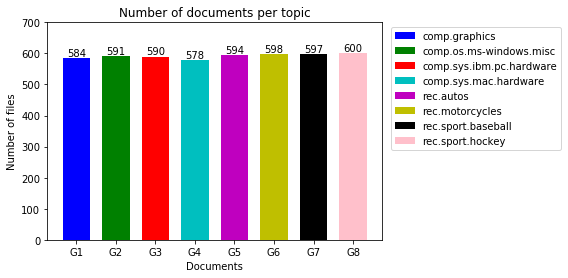

In [4]:
values = []
values = (len(c1_graphics_train.data), len(c1_misc_train.data),  len(c1_pc_train.data), len(c1_mac_train.data), len(c2_autos_train.data), len(c2_motocycle_train.data), len(c2_baseball_train.data), len(c2_hockey_train.data))
index = np.arange(8)
bar_width = 0.7
color = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'pink']
bars = plt.bar(index, values, bar_width, align = 'center', color = color)



plt.xlabel("Documents")
plt.ylabel('Number of files')
plt.title('Number of documents per topic')
plt.xticks(index, ('G1', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8'))
# plt.xticks(index + bar_width/2, ('comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey'))
plt.ylim(0,700)

# show the exact number of each column
for rect in bars:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%d' % int(height), ha='center', va='bottom')

plt.legend(bars, ('comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey'), loc = 'upper right', bbox_to_anchor=(1.55, 1))
plt.show()

# 2. Modeling Text Data and Feature Extraction:
## Problem b:


In [5]:
import re
import nltk
import string
import numpy as np
import _pickle as cPickle



In [6]:
from sklearn.datasets import fetch_20newsgroups
all_data = fetch_20newsgroups(subset='all', shuffle=True, random_state=42, remove=('headers','footers','quotes'))

# initialize stop words
from sklearn.feature_extraction import text
stop_words = text.ENGLISH_STOP_WORDS

# initialize stemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.tag import pos_tag
stemmer = SnowballStemmer("english")

def tokenizer(text):
    new_text = re.sub(r'[^A-Za-z]', " ", text)
    new_text = re.sub("[,.-:/()?{}*$#&]"," ",new_text)  # remove all symbols
    new_text = "".join([ch for ch in new_text if ch not in string.punctuation])  # remove all punctuation
    new_text = "".join(ch for ch in new_text if ord(ch) < 128)  # remove all non-ascii characters
    new_text = new_text.lower() # convert to lowercase
    tokens =[word for sent in nltk.sent_tokenize(new_text) for word in nltk.word_tokenize(sent)]
    new_tokens = []
    for token in tokens:
        if re.search('[a-zA-Z]{2,}', token):
            new_tokens.append(token)     
    stem = [stemmer.stem(t) for t in new_tokens]
    tagged_sent = pos_tag(stem)
    new_stem = [word for word,pos in tagged_sent if pos == 'NN'] # remove all non-noun words
    return new_stem

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(all_data.data)
print (vectors.shape)

TFxIDF = TfidfVectorizer(analyzer='word',tokenizer=tokenizer, stop_words=stop_words,token_pattern='[a-zA-Z]{2,}')
TFxIDF_mindf2 = TfidfVectorizer(analyzer='word',tokenizer=tokenizer, stop_words=stop_words,token_pattern='[a-zA-Z]{2,}', min_df = 2)
TFxIDF_mindf5 = TfidfVectorizer(analyzer='word',tokenizer=tokenizer, stop_words=stop_words,token_pattern='[a-zA-Z]{2,}', min_df = 5)

TFxIDF_data = TFxIDF.fit_transform(all_data.data)
TFxIDF_data_mindf2 = TFxIDF_mindf2.fit_transform(all_data.data)
TFxIDF_data_mindf5 = TFxIDF_mindf5.fit_transform(all_data.data)





(18846, 134410)


In [7]:
print (TFxIDF_data.shape)
print (TFxIDF_data_mindf2.shape)
print (TFxIDF_data_mindf5.shape)

(18846, 57177)
(18846, 25154)
(18846, 11604)


## Problem c:

In [31]:
from sklearn.datasets import fetch_20newsgroups
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import re
import nltk
import string
import numpy as np
import _pickle as cPickle

stemmer = SnowballStemmer('english')
substring_pair = {'all': 'All subsets included', 'train': 'Only training subsets included', 'test': 'Only testing subsets included'}
    
def ten_most_significant_helper (newsgroup, subset):
    data_list = fetch_20newsgroups(subset=subset, categories=[newsgroup], shuffle=True, random_state=42, remove=('headers', 'footers', 'quotes')).data
    punctuations = '[! \" # $ % \& \' \( \) \* + , \- \. \/ : ; < = > ? @ \[ \\ \] ^ _ ` { \| } ~]'

    for i in range(len(data_list)):
        data_list[i] = " ".join([stemmer.stem(data) for data in re.split(punctuations, data_list[i])])
        # data_list[i] = data_list[i].replace('\n','').replace('\t','').replace('\r','')
        new_text = re.sub(r'[^A-Za-z]', " ", data_list[i])
        new_text = re.sub("[,.-:/()?{}*$#&]"," ",new_text)  # remove all symbols
        new_text = "".join([ch for ch in new_text if ch not in string.punctuation])  # remove all punctuation
        new_text = "".join(ch for ch in new_text if ord(ch) < 128)  # remove all non-ascii characters
        new_text = new_text.lower() # convert to lowercase
        data_list[i] = new_text
        
    count_vect = CountVectorizer(max_features=10, stop_words ='english')
    X_counts = count_vect.fit_transform(data_list)

    print ('===================================')
    print ('Newsgroup class:\n    \"' + newsgroup + '\"\n')
    print ('Data subset:\n    ' + substring_pair[subset] +'\n')
    print ('10 most significant terms:')
    
    for (term, count) in zip(count_vect.get_feature_names(), X_counts.toarray().sum(axis = 0)):
        spaces = ''
        for i in range(15):
            if 15-i-len(term) > 0:
                spaces += ' '
        print (spaces + '\"' + term +'\" | ' + str(count))
        
    tfidf_transformer = TfidfTransformer()
    X_tfidf = tfidf_transformer.fit_transform(X_counts)
    
    print ('\nTFxIDF dimension:\n')
    print (X_tfidf.shape)

    
def ten_most_significant(newsgroup):
    ten_most_significant_helper(newsgroup,'all')
    ten_most_significant_helper(newsgroup,'train')
    ten_most_significant_helper(newsgroup,'test')


ten_most_significant('comp.sys.ibm.pc.hardware')
ten_most_significant('comp.sys.mac.hardware')
ten_most_significant('misc.forsale')
ten_most_significant('soc.religion.christian')

Newsgroup class:
    "comp.sys.ibm.pc.hardware"

Data subset:
    All subsets included

10 most significant terms:
            "ani" | 460
           "card" | 537
        "control" | 429
           "disk" | 387
          "drive" | 930
             "mb" | 390
        "problem" | 353
           "scsi" | 614
            "use" | 742
           "work" | 363

TFxIDF dimension:

(982, 10)
Newsgroup class:
    "comp.sys.ibm.pc.hardware"

Data subset:
    Only training subsets included

10 most significant terms:
            "ani" | 287
           "card" | 354
        "control" | 302
           "disk" | 291
          "drive" | 700
             "mb" | 289
        "problem" | 218
           "scsi" | 467
            "use" | 481
           "work" | 208

TFxIDF dimension:

(590, 10)
Newsgroup class:
    "comp.sys.ibm.pc.hardware"

Data subset:
    Only testing subsets included

10 most significant terms:
            "ani" | 173
           "card" | 183
          "drive" | 230
             "dx" | 133


# 3. Feature Selection

## Problem d: 

In [35]:
from sklearn.datasets import fetch_20newsgroups
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
import re

computer_technology_subclasses = ['comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware']
recreational_activity_subclasses = ['rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey']

# training data for 8 classes
training_data = fetch_20newsgroups(subset='train', categories=computer_technology_subclasses+recreational_activity_subclasses, shuffle=True, random_state=42, remove=('headers', 'footers', 'quotes'))

stemmer = SnowballStemmer("english")


#===================Remove Punctuation & Stem & Stop Words=====================
punctuations = '[! \" # $ % \& \' \( \) \* + , \- \. \/ : ; < = > ? @ \[ \\ \] ^ _ ` { \| } ~]'
def remove_punctuation_and_stem(data_list):
    for i in range(len(data_list)):
        data_list[i] = " ".join([stemmer.stem(data) for data in re.split(punctuations, data_list[i])])
        data_list[i] = data_list[i].replace('\n','').replace('\t','').replace('\r','')
        
remove_punctuation_and_stem(training_data.data)

# TF-IDF matrix for min_df = 2 and min_df = 5
count_vect_mindf2 = CountVectorizer(min_df=2, stop_words ='english')
count_vect_mindf5 = CountVectorizer(min_df=5, stop_words ='english')

X_counts_mindf2 = count_vect_mindf2.fit_transform(training_data.data)
X_counts_mindf5 = count_vect_mindf5.fit_transform(training_data.data)

#==============================================================================

tfidf_transformer = TfidfTransformer()

X_tfidf_mindf2 = tfidf_transformer.fit_transform(X_counts_mindf2)
X_tfidf_mindf5 = tfidf_transformer.fit_transform(X_counts_mindf5)


# Get the LSI matrix for training sets in 8 classes

svd = TruncatedSVD(n_components = 50, n_iter = 10,random_state = 42)
# LSI -> mindf = 2
svd.fit(X_tfidf_mindf2)
LSI_mindf2 = svd.transform(X_tfidf_mindf2)
# LSI -> mindf = 5
svd.fit(X_tfidf_mindf5)
LSI_mindf5 = svd.transform(X_tfidf_mindf5)

# Get the NMF matrix
nmf = NMF(n_components = 50, max_iter = 10,random_state = 42)
# NMF -> mindf = 2
nmf.fit(X_tfidf_mindf2)
NMF_mindf2 = nmf.transform(X_tfidf_mindf2)



In [36]:
# Number of documents in training sets => num of rows in TF-IDF matrix
# Number of dimensions after dimensionality reduction => num of columns in TF-IDF matrix
print (LSI_mindf2.shape)
print (LSI_mindf5.shape)
print (NMF_mindf2.shape)

(4732, 50)
(4732, 50)
(4732, 50)


# 4. Learning Algorithms

## Problem e:

============================Predict LSI_mindf2 data with linear SVM classifier==============================
Classification report:
             precision    recall  f1-score   support

   Com Tech       0.89      0.98      0.93      1590
    Rec Act       0.98      0.88      0.92      1560

avg / total       0.93      0.93      0.93      3150


Confusion Matrix:
[[1555   35]
 [ 194 1366]]

Total accuracy: 
0.927301587302


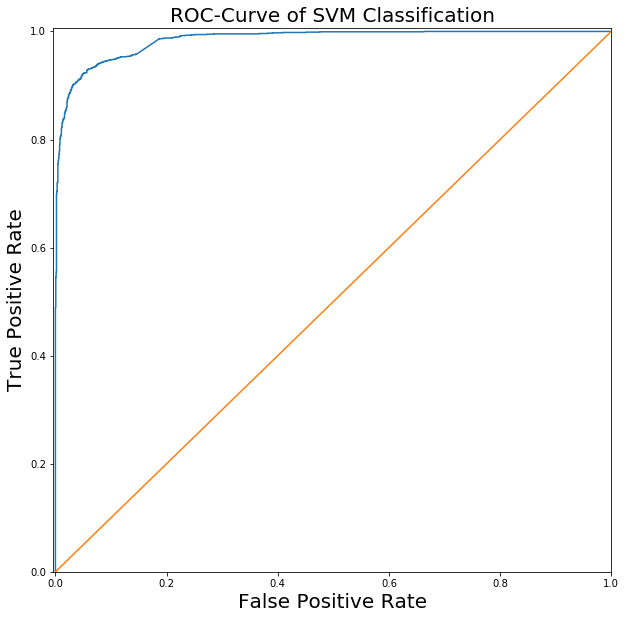

============================Predict LSI_mindf2 data with hard SVM classifier==============================
Classification report:
             precision    recall  f1-score   support

   Com Tech       0.51      1.00      0.67      1590
    Rec Act       0.77      0.01      0.03      1560

avg / total       0.64      0.51      0.35      3150


Confusion Matrix:
[[1584    6]
 [1540   20]]

Total accuracy: 
0.509206349206


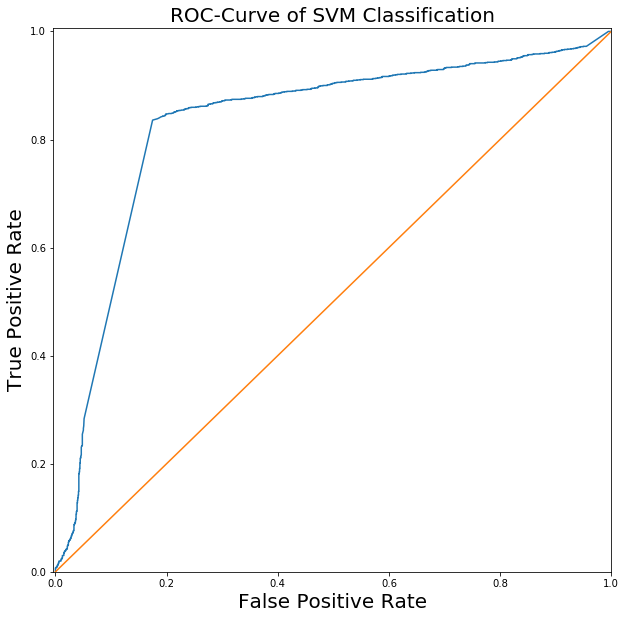

============================Predict LSI_mindf2 data with soft SVM classifier==============================
Classification report:
             precision    recall  f1-score   support

   Com Tech       0.50      1.00      0.67      1590
    Rec Act       0.00      0.00      0.00      1560

avg / total       0.25      0.50      0.34      3150


Confusion Matrix:
[[1590    0]
 [1560    0]]

Total accuracy: 
0.504761904762


/Users/dui/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


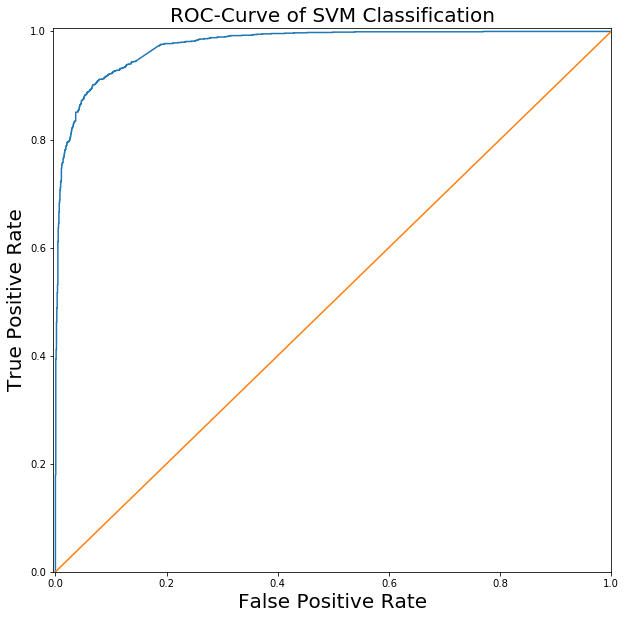

============================Predict LSI_mindf5 data with linear SVM classifier==============================
Classification report:
             precision    recall  f1-score   support

   Com Tech       0.90      0.98      0.93      1590
    Rec Act       0.97      0.88      0.93      1560

avg / total       0.93      0.93      0.93      3150


Confusion Matrix:
[[1552   38]
 [ 182 1378]]

Total accuracy: 
0.930158730159


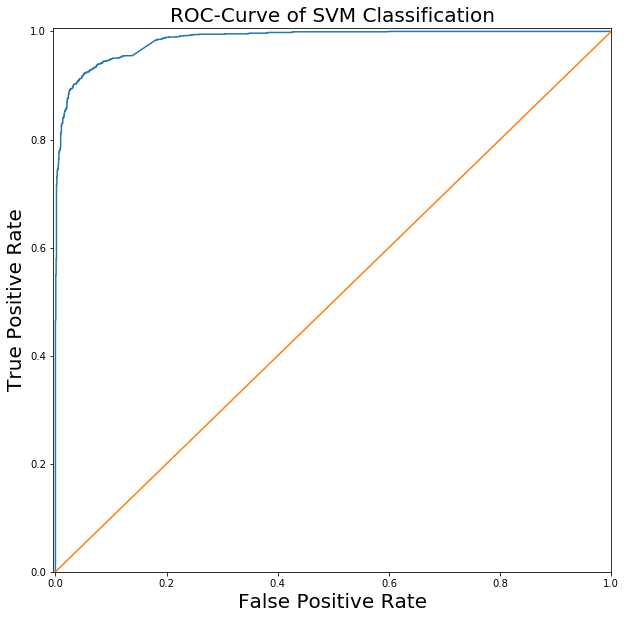

============================Predict LSI_mindf5 data with hard SVM classifier==============================
Classification report:
             precision    recall  f1-score   support

   Com Tech       0.51      1.00      0.67      1590
    Rec Act       0.79      0.01      0.02      1560

avg / total       0.65      0.51      0.35      3150


Confusion Matrix:
[[1586    4]
 [1545   15]]

Total accuracy: 
0.508253968254


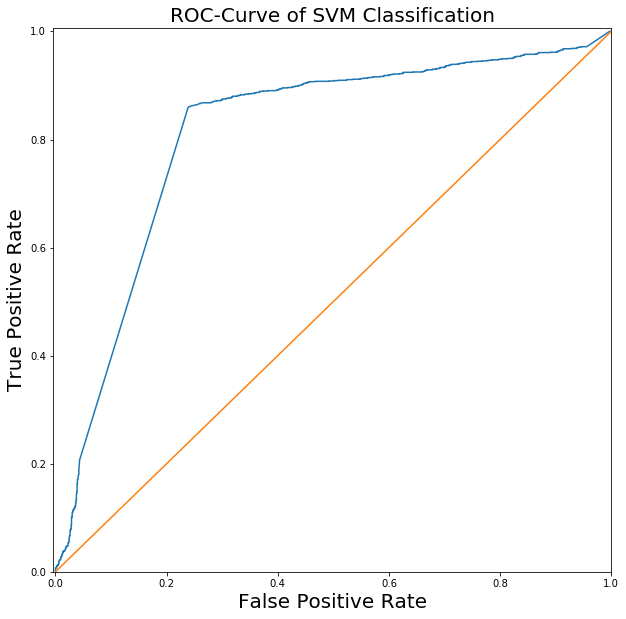

============================Predict LSI_mindf5 data with soft SVM classifier==============================
Classification report:
             precision    recall  f1-score   support

   Com Tech       0.50      1.00      0.67      1590
    Rec Act       0.00      0.00      0.00      1560

avg / total       0.25      0.50      0.34      3150


Confusion Matrix:
[[1590    0]
 [1560    0]]

Total accuracy: 
0.504761904762


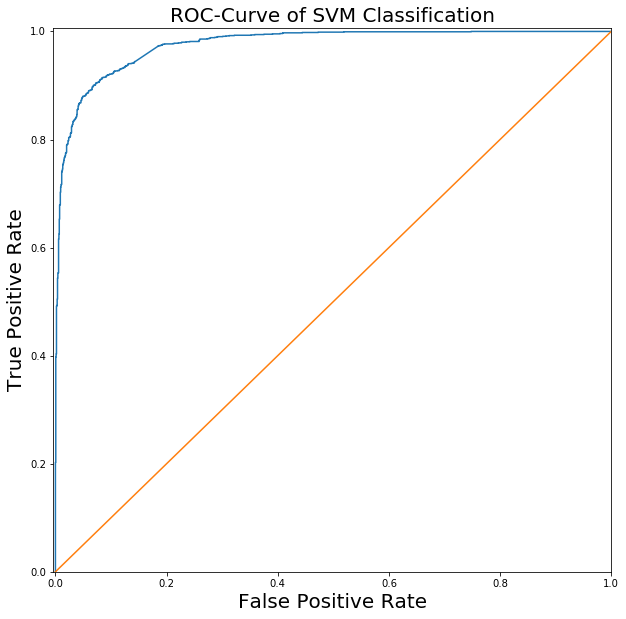

============================Predict NMF_mindf2_data with linear SVM classifier==============================
Classification report:
             precision    recall  f1-score   support

   Com Tech       0.83      0.97      0.89      1590
    Rec Act       0.96      0.79      0.87      1560

avg / total       0.89      0.88      0.88      3150


Confusion Matrix:
[[1536   54]
 [ 320 1240]]

Total accuracy: 
0.88126984127


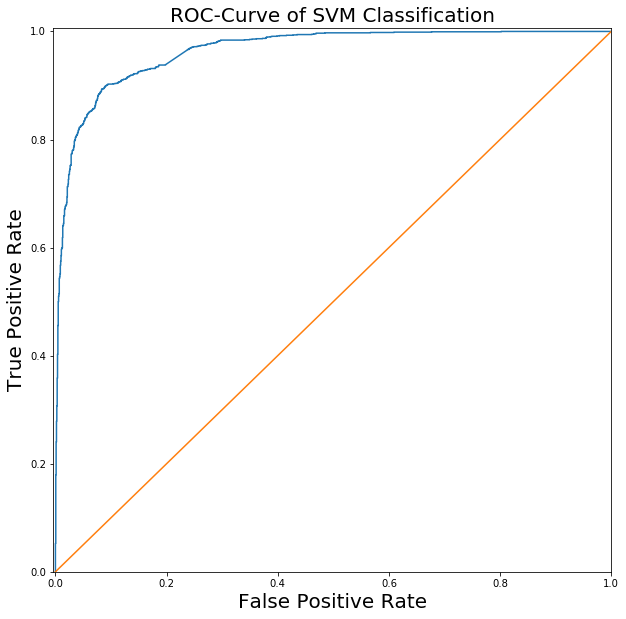

============================Predict NMF_mindf2_data with hard SVM classifier==============================
Classification report:
             precision    recall  f1-score   support

   Com Tech       0.89      0.72      0.80      1590
    Rec Act       0.76      0.91      0.83      1560

avg / total       0.83      0.82      0.82      3150


Confusion Matrix:
[[1150  440]
 [ 136 1424]]

Total accuracy: 
0.817142857143


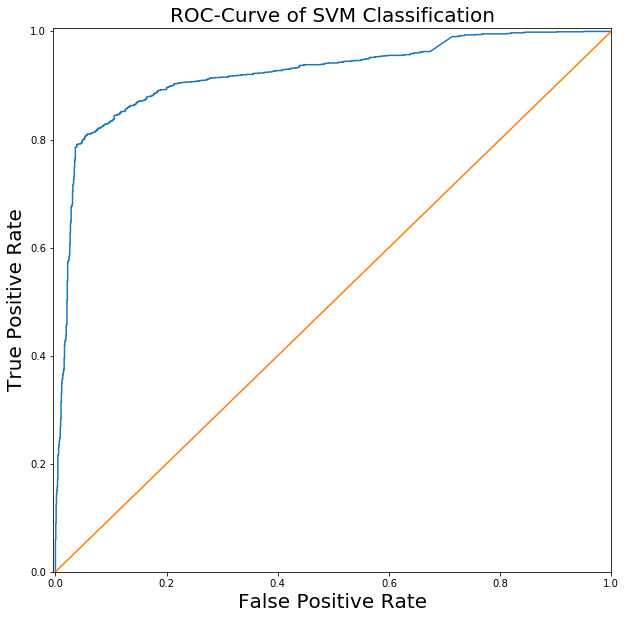

============================Predict NMF_mindf2_data with soft SVM classifier==============================
Classification report:
             precision    recall  f1-score   support

   Com Tech       0.50      1.00      0.67      1590
    Rec Act       0.00      0.00      0.00      1560

avg / total       0.25      0.50      0.34      3150


Confusion Matrix:
[[1590    0]
 [1560    0]]

Total accuracy: 
0.504761904762


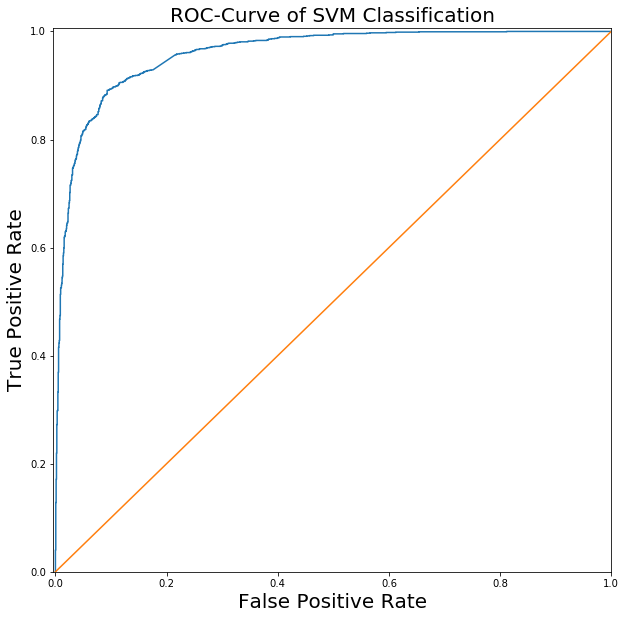

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.datasets import fetch_20newsgroups
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn import metrics
from sklearn import svm
import re


# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.metrics import roc_curve
# from sklearn.datasets import fetch_20newsgroups
# from nltk.stem.snowball import SnowballStemmer
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.feature_extraction.text import TfidfTransformer
# from sklearn.decomposition import TruncatedSVD
# from sklearn import metrics
# from sklearn import svm
# from sklearn.cross_validation import cross_val_predict
# import re



#=================================Obtain data==================================
computer_technology_subclasses = ['comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware']
recreational_activity_subclasses = ['rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey']
  
comp_tech_train = fetch_20newsgroups(subset='train', categories=computer_technology_subclasses, shuffle=True, random_state=42, remove=('headers', 'footers', 'quotes'))
rec_act_train = fetch_20newsgroups(subset='train', categories=recreational_activity_subclasses, shuffle=True, random_state=42, remove=('headers', 'footers', 'quotes'))
comp_tech_test = fetch_20newsgroups(subset='test', categories=computer_technology_subclasses, shuffle=True, random_state=42, remove=('headers', 'footers', 'quotes'))
rec_act_test = fetch_20newsgroups(subset='test', categories=recreational_activity_subclasses, shuffle=True, random_state=42, remove=('headers', 'footers', 'quotes'))

all_data = comp_tech_train.data+comp_tech_test.data+rec_act_train.data+rec_act_test.data

stemmer = SnowballStemmer("english")

classification_train = [1] * len(comp_tech_train.data) + [-1] * len(rec_act_train.data)
classification_test = [1] * len(comp_tech_test.data) + [-1] * len(rec_act_test.data)
#==============================================================================


#===================Remove Punctuation & Stem & Stop Words=====================
punctuations = '[! \" # $ % \& \' \( \) \* + , \- \. \/ : ; < = > ? @ \[ \\ \] ^ _ ` { \| } ~]'
def remove_punctuation_and_stem(data_list):
    for i in range(len(data_list)):
        data_list[i] = " ".join([stemmer.stem(data) for data in re.split(punctuations, data_list[i])])
        data_list[i] = data_list[i].replace('\n','').replace('\t','').replace('\r','')
        
remove_punctuation_and_stem(all_data)

# TF-IDF matrix for min_df = 2 and min_df = 5
count_vect_mindf2 = CountVectorizer(min_df=2, stop_words ='english')
count_vect_mindf5 = CountVectorizer(min_df=5, stop_words ='english')

X_counts_mindf2 = count_vect_mindf2.fit_transform(all_data)
X_counts_mindf5 = count_vect_mindf5.fit_transform(all_data)

#==============================================================================

tfidf_transformer = TfidfTransformer()

X_tfidf_mindf2 = tfidf_transformer.fit_transform(X_counts_mindf2)
X_tfidf_mindf5 = tfidf_transformer.fit_transform(X_counts_mindf5)


# Get the LSI matrix for training sets in 8 classes

svd = TruncatedSVD(n_components = 50, n_iter = 10,random_state = 42)
# LSI -> mindf = 2
svd.fit(X_tfidf_mindf2)
LSI_mindf2 = svd.transform(X_tfidf_mindf2)
# LSI -> mindf = 5
svd.fit(X_tfidf_mindf5)
LSI_mindf5 = svd.transform(X_tfidf_mindf5)

# Get the NMF matrix
nmf = NMF(n_components = 50, max_iter = 10,random_state = 42)
# NMF -> mindf = 2
nmf.fit(X_tfidf_mindf2)
NMF_mindf2 = nmf.transform(X_tfidf_mindf2)


#======================Split training and testing data=========================
split_point_1 = len(comp_tech_train.data)
split_point_2 = split_point_1 + len(comp_tech_test.data)
split_point_3 = split_point_2 + len(rec_act_train.data)

# split mindf2 LSI data
LSI_mindf2_test = np.concatenate((LSI_mindf2[split_point_1 : split_point_2], LSI_mindf2[split_point_3:]))
LSI_mindf2_train = np.concatenate((LSI_mindf2[0:split_point_1], LSI_mindf2[split_point_2:split_point_3]))

# split mindf5 LSI data
LSI_mindf5_test = np.concatenate((LSI_mindf5[split_point_1 : split_point_2], LSI_mindf5[split_point_3:]))
LSI_mindf5_train = np.concatenate((LSI_mindf5[0:split_point_1], LSI_mindf5[split_point_2:split_point_3]))

# split mindf2 NMF data
NMF_mindf2_test = np.concatenate((NMF_mindf2[split_point_1 : split_point_2], NMF_mindf2[split_point_3:]))
NMF_mindf2_train = np.concatenate((NMF_mindf2[0:split_point_1], NMF_mindf2[split_point_2:split_point_3]))
#==============================================================================

print('============================Predict LSI_mindf2 data with linear SVM classifier==============================')
classifier_hard = svm.SVC(kernel = 'linear')
classifier_hard.fit(LSI_mindf2_train, classification_train)

predicted_class = classifier_hard.predict(LSI_mindf2_test)
actual_class = classification_test
score = classifier_hard.decision_function(LSI_mindf2_test)



print ('Classification report:')
print ('=======================================================')
print (metrics.classification_report(actual_class, predicted_class, target_names=["Com Tech","Rec Act"]))
print ('=======================================================\n')

print ('Confusion Matrix:')
print ('==============')
print (metrics.confusion_matrix(actual_class, predicted_class)) 
print ('==============\n')

print ('Total accuracy: ')
print (np.mean(actual_class == predicted_class))

fpr, tpr, threshold = roc_curve(actual_class, score)
line = [0, 1]
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1])
plt.ylabel('True Positive Rate', fontsize = 20)
plt.xlabel('False Positive Rate', fontsize = 20)
plt.title('ROC-Curve of SVM Classification', fontsize = 20)
plt.axis([-0.004, 1, 0, 1.006])
plt.show()
#==============================================================================


print('============================Predict LSI_mindf2 data with hard SVM classifier==============================')
classifier_hard = svm.SVC(kernel = 'rbf', gamma = 1000)
classifier_hard.fit(LSI_mindf2_train, classification_train)

predicted_class = classifier_hard.predict(LSI_mindf2_test)
actual_class = classification_test
score = classifier_hard.decision_function(LSI_mindf2_test)



print ('Classification report:')
print ('=======================================================')
print (metrics.classification_report(actual_class, predicted_class, target_names=["Com Tech","Rec Act"]))
print ('=======================================================\n')

print ('Confusion Matrix:')
print ('==============')
print (metrics.confusion_matrix(actual_class, predicted_class)) 
print ('==============\n')

print ('Total accuracy: ')
print (np.mean(actual_class == predicted_class))

fpr, tpr, threshold = roc_curve(actual_class, score)
line = [0, 1]
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1])
plt.ylabel('True Positive Rate', fontsize = 20)
plt.xlabel('False Positive Rate', fontsize = 20)
plt.title('ROC-Curve of SVM Classification', fontsize = 20)
plt.axis([-0.004, 1, 0, 1.006])
plt.show()
#==============================================================================


print('============================Predict LSI_mindf2 data with soft SVM classifier==============================')
classifier_soft = svm.SVC(kernel = 'rbf', gamma = 0.001)
classifier_soft.fit(LSI_mindf2_train, classification_train)

predicted_class = classifier_soft.predict(LSI_mindf2_test)
actual_class = classification_test
score = classifier_soft.decision_function(LSI_mindf2_test)



print ('Classification report:')
print ('=======================================================')
print (metrics.classification_report(actual_class, predicted_class, target_names=["Com Tech","Rec Act"]))
print ('=======================================================\n')

print ('Confusion Matrix:')
print ('==============')
print (metrics.confusion_matrix(actual_class, predicted_class)) 
print ('==============\n')

print ('Total accuracy: ')
print (np.mean(actual_class == predicted_class))

fpr, tpr, threshold = roc_curve(actual_class, score)
line = [0, 1]
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1])
plt.ylabel('True Positive Rate', fontsize = 20)
plt.xlabel('False Positive Rate', fontsize = 20)
plt.title('ROC-Curve of SVM Classification', fontsize = 20)
plt.axis([-0.004, 1, 0, 1.006])
plt.show()
#==============================================================================

print('============================Predict LSI_mindf5 data with linear SVM classifier==============================')
classifier_hard = svm.SVC(kernel = 'linear')
classifier_hard.fit(LSI_mindf5_train, classification_train)

predicted_class = classifier_hard.predict(LSI_mindf5_test)
actual_class = classification_test
score = classifier_hard.decision_function(LSI_mindf5_test)



print ('Classification report:')
print ('=======================================================')
print (metrics.classification_report(actual_class, predicted_class, target_names=["Com Tech","Rec Act"]))
print ('=======================================================\n')

print ('Confusion Matrix:')
print ('==============')
print (metrics.confusion_matrix(actual_class, predicted_class)) 
print ('==============\n')

print ('Total accuracy: ')
print (np.mean(actual_class == predicted_class))

fpr, tpr, threshold = roc_curve(actual_class, score)
line = [0, 1]
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1])
plt.ylabel('True Positive Rate', fontsize = 20)
plt.xlabel('False Positive Rate', fontsize = 20)
plt.title('ROC-Curve of SVM Classification', fontsize = 20)
plt.axis([-0.004, 1, 0, 1.006])
plt.show()
#==============================================================================


print('============================Predict LSI_mindf5 data with hard SVM classifier==============================')
classifier_hard = svm.SVC(kernel = 'rbf', gamma = 1000)
classifier_hard.fit(LSI_mindf5_train, classification_train)

predicted_class = classifier_hard.predict(LSI_mindf5_test)
actual_class = classification_test
score = classifier_hard.decision_function(LSI_mindf5_test)



print ('Classification report:')
print ('=======================================================')
print (metrics.classification_report(actual_class, predicted_class, target_names=["Com Tech","Rec Act"]))
print ('=======================================================\n')

print ('Confusion Matrix:')
print ('==============')
print (metrics.confusion_matrix(actual_class, predicted_class)) 
print ('==============\n')

print ('Total accuracy: ')
print (np.mean(actual_class == predicted_class))

fpr, tpr, threshold = roc_curve(actual_class, score)
line = [0, 1]
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1])
plt.ylabel('True Positive Rate', fontsize = 20)
plt.xlabel('False Positive Rate', fontsize = 20)
plt.title('ROC-Curve of SVM Classification', fontsize = 20)
plt.axis([-0.004, 1, 0, 1.006])
plt.show()
#==============================================================================


print('============================Predict LSI_mindf5 data with soft SVM classifier==============================')
classifier_soft = svm.SVC(kernel = 'rbf', gamma = 0.001)
classifier_soft.fit(LSI_mindf5_train, classification_train)

predicted_class = classifier_soft.predict(LSI_mindf5_test)
actual_class = classification_test
score = classifier_soft.decision_function(LSI_mindf5_test)



print ('Classification report:')
print ('=======================================================')
print (metrics.classification_report(actual_class, predicted_class, target_names=["Com Tech","Rec Act"]))
print ('=======================================================\n')

print ('Confusion Matrix:')
print ('==============')
print (metrics.confusion_matrix(actual_class, predicted_class)) 
print ('==============\n')

print ('Total accuracy: ')
print (np.mean(actual_class == predicted_class))

fpr, tpr, threshold = roc_curve(actual_class, score)
line = [0, 1]
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1])
plt.ylabel('True Positive Rate', fontsize = 20)
plt.xlabel('False Positive Rate', fontsize = 20)
plt.title('ROC-Curve of SVM Classification', fontsize = 20)
plt.axis([-0.004, 1, 0, 1.006])
plt.show()
#==============================================================================

print('============================Predict NMF_mindf2_data with linear SVM classifier==============================')
classifier_hard = svm.SVC(kernel = 'linear')
classifier_hard.fit(NMF_mindf2_train, classification_train)

predicted_class = classifier_hard.predict(NMF_mindf2_test)
actual_class = classification_test
score = classifier_hard.decision_function(NMF_mindf2_test)



print ('Classification report:')
print ('=======================================================')
print (metrics.classification_report(actual_class, predicted_class, target_names=["Com Tech","Rec Act"]))
print ('=======================================================\n')

print ('Confusion Matrix:')
print ('==============')
print (metrics.confusion_matrix(actual_class, predicted_class)) 
print ('==============\n')

print ('Total accuracy: ')
print (np.mean(actual_class == predicted_class))

fpr, tpr, threshold = roc_curve(actual_class, score)
line = [0, 1]
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1])
plt.ylabel('True Positive Rate', fontsize = 20)
plt.xlabel('False Positive Rate', fontsize = 20)
plt.title('ROC-Curve of SVM Classification', fontsize = 20)
plt.axis([-0.004, 1, 0, 1.006])
plt.show()
#==============================================================================

print('============================Predict NMF_mindf2_data with hard SVM classifier==============================')
classifier_hard = svm.SVC(kernel = 'rbf', gamma = 1000)
classifier_hard.fit(NMF_mindf2_train, classification_train)

predicted_class = classifier_hard.predict(NMF_mindf2_test)
actual_class = classification_test
score = classifier_hard.decision_function(NMF_mindf2_test)



print ('Classification report:')
print ('=======================================================')
print (metrics.classification_report(actual_class, predicted_class, target_names=["Com Tech","Rec Act"]))
print ('=======================================================\n')

print ('Confusion Matrix:')
print ('==============')
print (metrics.confusion_matrix(actual_class, predicted_class)) 
print ('==============\n')

print ('Total accuracy: ')
print (np.mean(actual_class == predicted_class))

fpr, tpr, threshold = roc_curve(actual_class, score)
line = [0, 1]
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1])
plt.ylabel('True Positive Rate', fontsize = 20)
plt.xlabel('False Positive Rate', fontsize = 20)
plt.title('ROC-Curve of SVM Classification', fontsize = 20)
plt.axis([-0.004, 1, 0, 1.006])
plt.show()
#==============================================================================


print('============================Predict NMF_mindf2_data with soft SVM classifier==============================')
classifier_soft = svm.SVC(kernel = 'rbf', gamma = 0.001)
classifier_soft.fit(NMF_mindf2_train, classification_train)

predicted_class = classifier_soft.predict(NMF_mindf2_test)
actual_class = classification_test
score = classifier_soft.decision_function(NMF_mindf2_test)



print ('Classification report:')
print ('=======================================================')
print (metrics.classification_report(actual_class, predicted_class, target_names=["Com Tech","Rec Act"]))
print ('=======================================================\n')

print ('Confusion Matrix:')
print ('==============')
print (metrics.confusion_matrix(actual_class, predicted_class)) 
print ('==============\n')

print ('Total accuracy: ')
print (np.mean(actual_class == predicted_class))

fpr, tpr, threshold = roc_curve(actual_class, score)
line = [0, 1]
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1])
plt.ylabel('True Positive Rate', fontsize = 20)
plt.xlabel('False Positive Rate', fontsize = 20)
plt.title('ROC-Curve of SVM Classification', fontsize = 20)
plt.axis([-0.004, 1, 0, 1.006])
plt.show()
#==============================================================================


## Problem f:

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.datasets import fetch_20newsgroups
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn import metrics
from sklearn import svm
from sklearn.model_selection import cross_val_predict
import re


#=================================Obtain data==================================
computer_technology_subclasses = ['comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware']
recreational_activity_subclasses = ['rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey']
  
comp_tech_train = fetch_20newsgroups(subset='train', categories=computer_technology_subclasses, shuffle=True, random_state=42, remove=('headers', 'footers', 'quotes'))
rec_act_train = fetch_20newsgroups(subset='train', categories=recreational_activity_subclasses, shuffle=True, random_state=42, remove=('headers', 'footers', 'quotes'))
comp_tech_test = fetch_20newsgroups(subset='test', categories=computer_technology_subclasses, shuffle=True, random_state=42, remove=('headers', 'footers', 'quotes'))
rec_act_test = fetch_20newsgroups(subset='test', categories=recreational_activity_subclasses, shuffle=True, random_state=42, remove=('headers', 'footers', 'quotes'))

all_data = comp_tech_train.data+comp_tech_test.data+rec_act_train.data+rec_act_test.data

stemmer = SnowballStemmer("english")

classification_all = [1] * (len(comp_tech_train.data)+len(comp_tech_test.data)) + [-1] * (len(rec_act_train.data)+len(rec_act_test.data))
#==============================================================================




#===================Remove Punctuation & Stem & Stop Words=====================
punctuations = '[! \" # $ % \& \' \( \) \* + , \- \. \/ : ; < = > ? @ \[ \\ \] ^ _ ` { \| } ~]'
def remove_punctuation_and_stem(data_list):
    for i in range(len(data_list)):
        data_list[i] = " ".join([stemmer.stem(data) for data in re.split(punctuations, data_list[i])])
        data_list[i] = data_list[i].replace('\n','').replace('\t','').replace('\r','')

remove_punctuation_and_stem(all_data)

# TF-IDF matrix for min_df = 2 and min_df = 5
count_vect_mindf2 = CountVectorizer(min_df=2, stop_words ='english')
count_vect_mindf5 = CountVectorizer(min_df=5, stop_words ='english')

X_counts_mindf2 = count_vect_mindf2.fit_transform(all_data)
X_counts_mindf5 = count_vect_mindf5.fit_transform(all_data)

#==============================================================================

tfidf_transformer = TfidfTransformer()

X_tfidf_mindf2 = tfidf_transformer.fit_transform(X_counts_mindf2)
X_tfidf_mindf5 = tfidf_transformer.fit_transform(X_counts_mindf5)


# Get the LSI matrix for training sets in 8 classes

svd = TruncatedSVD(n_components = 50, n_iter = 10,random_state = 42)
# LSI -> mindf = 2
svd.fit(X_tfidf_mindf2)
LSI_mindf2 = svd.transform(X_tfidf_mindf2)
# LSI -> mindf = 5
svd.fit(X_tfidf_mindf5)
LSI_mindf5 = svd.transform(X_tfidf_mindf5)

# Get the NMF matrix

nmf = NMF(n_components = 50, max_iter = 10,random_state = 42)
# NMF -> mindf = 2
nmf.fit(X_tfidf_mindf2)
NMF_mindf2 = nmf.transform(X_tfidf_mindf2)


print('#================================LSI_mindf2===================================')

for gamma_value in [0.001, 0.01, 0.1, 1, 10, 100, 1000]:
    classifier = svm.SVC(gamma = gamma_value)
    classifier.fit(LSI_mindf2, classification_all)
    predicted_class =  cross_val_predict(classifier, LSI_mindf2, classification_all, cv=5)
    
    
    pound_sign = ''
    spaces = ''
    for i in range(len(str(gamma_value))):
        pound_sign += '#'
        spaces += ' '
    print ('#################' + pound_sign +'\n#               ' + spaces + '#')
    print ('# Gamma value: ' + str(gamma_value) + ' #')
    print ('#               ' + spaces + '#\n#################' + pound_sign)
    
    print ('\n              Classification report:')
    print ('=======================================================')
    print (metrics.classification_report(classification_all, predicted_class, target_names=["Com Tech","Rec Act"]))
    print ('=======================================================\n')
    
    print ('Confusion Matrix:')
    print ('==============')
    print (metrics.confusion_matrix(classification_all, predicted_class))
    print ('==============\n')

    print ('Total accuracy: ')
    print (np.mean(predicted_class == classification_all))
    print ('\n\n\n\n')
    

print('#================================LSI_mindf5===================================')

for gamma_value in [0.001, 0.01, 0.1, 1, 10, 100, 1000]:
    classifier = svm.SVC(gamma = gamma_value)
    classifier.fit(LSI_mindf5, classification_all)
    predicted_class =  cross_val_predict(classifier, LSI_mindf5, classification_all, cv=5)
    
    
    pound_sign = ''
    spaces = ''
    for i in range(len(str(gamma_value))):
        pound_sign += '#'
        spaces += ' '
    print ('#################' + pound_sign +'\n#               ' + spaces + '#')
    print ('# Gamma value: ' + str(gamma_value) + ' #')
    print ('#               ' + spaces + '#\n#################' + pound_sign)
    
    print ('\n              Classification report:')
    print ('=======================================================')
    print (metrics.classification_report(classification_all, predicted_class, target_names=["Com Tech","Rec Act"]))
    print ('=======================================================\n')
    
    print ('Confusion Matrix:')
    print ('==============')
    print (metrics.confusion_matrix(classification_all, predicted_class))
    print ('==============\n')

    print ('Total accuracy: ')
    print (np.mean(predicted_class == classification_all))
    print ('\n\n\n\n')
    
print('#================================NMF_mindf2===================================')

for gamma_value in [0.001, 0.01, 0.1, 1, 10, 100, 1000]:
    classifier = svm.SVC(gamma = gamma_value)
    classifier.fit(NMF_mindf2, classification_all)
    predicted_class =  cross_val_predict(classifier, NMF_mindf2, classification_all, cv=5)
    
    
    pound_sign = ''
    spaces = ''
    for i in range(len(str(gamma_value))):
        pound_sign += '#'
        spaces += ' '
    print ('#################' + pound_sign +'\n#               ' + spaces + '#')
    print ('# Gamma value: ' + str(gamma_value) + ' #')
    print ('#               ' + spaces + '#\n#################' + pound_sign)
    
    print ('\n              Classification report:')
    print ('=======================================================')
    print (metrics.classification_report(classification_all, predicted_class, target_names=["Com Tech","Rec Act"]))
    print ('=======================================================\n')
    
    print ('Confusion Matrix:')
    print ('==============')
    print (metrics.confusion_matrix(classification_all, predicted_class))
    print ('==============\n')

    print ('Total accuracy: ')
    print (np.mean(predicted_class == classification_all))
    print ('\n\n\n\n')

#================================LSI_mindf2===================================
######################
#                    #
# Gamma value: 0.001 #
#                    #
######################

              Classification report:
             precision    recall  f1-score   support

   Com Tech       0.50      1.00      0.67      3979
    Rec Act       0.00      0.00      0.00      3903

avg / total       0.25      0.50      0.34      7882


Confusion Matrix:
[[3979    0]
 [3903    0]]

Total accuracy: 
0.504821111393







/Users/dui/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#####################
#                   #
# Gamma value: 0.01 #
#                   #
#####################

              Classification report:
             precision    recall  f1-score   support

   Com Tech       0.78      0.99      0.87      3979
    Rec Act       0.99      0.72      0.83      3903

avg / total       0.88      0.85      0.85      7882


Confusion Matrix:
[[3939   40]
 [1107 2796]]

Total accuracy: 
0.854478558741





####################
#                  #
# Gamma value: 0.1 #
#                  #
####################

              Classification report:
             precision    recall  f1-score   support

   Com Tech       0.87      0.98      0.92      3979
    Rec Act       0.98      0.85      0.91      3903

avg / total       0.92      0.91      0.91      7882


Confusion Matrix:
[[3901   78]
 [ 600 3303]]

Total accuracy: 
0.91398122304





##################
#                #
# Gamma value: 1 #
#                #
##################

              Cl

/Users/dui/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#####################
#                   #
# Gamma value: 0.01 #
#                   #
#####################

              Classification report:
             precision    recall  f1-score   support

   Com Tech       0.80      0.99      0.88      3979
    Rec Act       0.98      0.74      0.85      3903

avg / total       0.89      0.87      0.87      7882


Confusion Matrix:
[[3929   50]
 [ 996 2907]]

Total accuracy: 
0.867292565339





####################
#                  #
# Gamma value: 0.1 #
#                  #
####################

              Classification report:
             precision    recall  f1-score   support

   Com Tech       0.87      0.98      0.92      3979
    Rec Act       0.97      0.85      0.91      3903

avg / total       0.92      0.92      0.91      7882


Confusion Matrix:
[[3892   87]
 [ 580 3323]]

Total accuracy: 
0.915376807917





##################
#                #
# Gamma value: 1 #
#                #
##################

              C

/Users/dui/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#####################
#                   #
# Gamma value: 0.01 #
#                   #
#####################

              Classification report:
             precision    recall  f1-score   support

   Com Tech       0.50      1.00      0.67      3979
    Rec Act       0.00      0.00      0.00      3903

avg / total       0.25      0.50      0.34      7882


Confusion Matrix:
[[3979    0]
 [3903    0]]

Total accuracy: 
0.504821111393







/Users/dui/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


####################
#                  #
# Gamma value: 0.1 #
#                  #
####################

              Classification report:
             precision    recall  f1-score   support

   Com Tech       0.69      0.99      0.81      3979
    Rec Act       0.98      0.54      0.70      3903

avg / total       0.83      0.77      0.75      7882


Confusion Matrix:
[[3937   42]
 [1792 2111]]

Total accuracy: 
0.767317939609





##################
#                #
# Gamma value: 1 #
#                #
##################

              Classification report:
             precision    recall  f1-score   support

   Com Tech       0.85      0.96      0.90      3979
    Rec Act       0.95      0.83      0.89      3903

avg / total       0.90      0.89      0.89      7882


Confusion Matrix:
[[3827  152]
 [ 683 3220]]

Total accuracy: 
0.894062420705





###################
#                 #
# Gamma value: 10 #
#                 #
###################

              Classificat

## Problem g:

Classification report:
             precision    recall  f1-score   support

   Com Tech       0.85      0.97      0.91      1590
    Rec Act       0.97      0.83      0.89      1560

avg / total       0.91      0.90      0.90      3150


Confusion Matrix:
[[1545   45]
 [ 269 1291]]

Total accuracy: 
0.900317460317


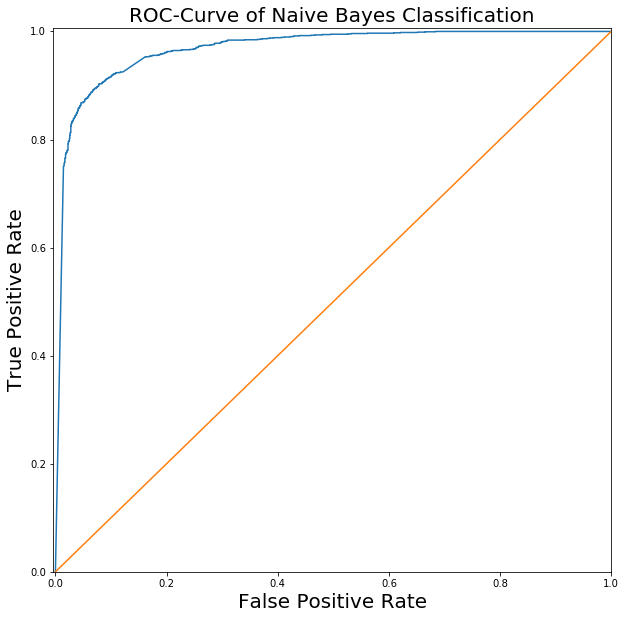

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.datasets import fetch_20newsgroups
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn import metrics
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
import re


#=================================Obtain data==================================
computer_technology_subclasses = ['comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware']
recreational_activity_subclasses = ['rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey']
  
comp_tech_train = fetch_20newsgroups(subset='train', categories=computer_technology_subclasses, shuffle=True, random_state=42, remove=('headers', 'footers', 'quotes'))
rec_act_train = fetch_20newsgroups(subset='train', categories=recreational_activity_subclasses, shuffle=True, random_state=42, remove=('headers', 'footers', 'quotes'))
comp_tech_test = fetch_20newsgroups(subset='test', categories=computer_technology_subclasses, shuffle=True, random_state=42, remove=('headers', 'footers', 'quotes'))
rec_act_test = fetch_20newsgroups(subset='test', categories=recreational_activity_subclasses, shuffle=True, random_state=42, remove=('headers', 'footers', 'quotes'))

all_data = comp_tech_train.data+comp_tech_test.data+rec_act_train.data+rec_act_test.data

stemmer = SnowballStemmer("english")

classification_train = [1] * len(comp_tech_train.data) + [-1] * len(rec_act_train.data)
classification_test = [1] * len(comp_tech_test.data) + [-1] * len(rec_act_test.data)
#==============================================================================




#===================Remove Punctuation & Stem & Stop Words=====================
punctuations = '[! \" # $ % \& \' \( \) \* + , \- \. \/ : ; < = > ? @ \[ \\ \] ^ _ ` { \| } ~]'
def remove_punctuation_and_stem(data_list):
    for i in range(len(data_list)):
        data_list[i] = " ".join([stemmer.stem(data) for data in re.split(punctuations, data_list[i])])
        data_list[i] = data_list[i].replace('\n','').replace('\t','').replace('\r','')

remove_punctuation_and_stem(all_data)



# TF-IDF matrix for min_df = 2 and min_df = 5
count_vect_mindf2 = CountVectorizer(min_df=2, stop_words ='english')
count_vect_mindf5 = CountVectorizer(min_df=5, stop_words ='english')

X_counts_mindf2 = count_vect_mindf2.fit_transform(all_data)
X_counts_mindf5 = count_vect_mindf5.fit_transform(all_data)

#================================Feature Extraction==========================================

tfidf_transformer = TfidfTransformer()

X_tfidf_mindf2 = tfidf_transformer.fit_transform(X_counts_mindf2)
X_tfidf_mindf5 = tfidf_transformer.fit_transform(X_counts_mindf5)


# Get the LSI matrix for training sets in 8 classes

svd = TruncatedSVD(n_components = 50, n_iter = 10,random_state = 42)
# LSI -> mindf = 2
svd.fit(X_tfidf_mindf2)
LSI_mindf2 = svd.transform(X_tfidf_mindf2)
# LSI -> mindf = 5
svd.fit(X_tfidf_mindf5)
LSI_mindf5 = svd.transform(X_tfidf_mindf5)

# Get the NMF matrix

nmf = NMF(n_components = 50, max_iter = 10,random_state = 42)
# NMF -> mindf = 2
nmf.fit(X_tfidf_mindf2)
NMF_mindf2 = nmf.transform(X_tfidf_mindf2)
#==============================================================================

#======================Split training and testing data=========================
split_point_1 = len(comp_tech_train.data)
split_point_2 = split_point_1 + len(comp_tech_test.data)
split_point_3 = split_point_2 + len(rec_act_train.data)

# split mindf2 LSI data
LSI_mindf2_test = np.concatenate((LSI_mindf2[split_point_1 : split_point_2], LSI_mindf2[split_point_3:]))
LSI_mindf2_train = np.concatenate((LSI_mindf2[0:split_point_1], LSI_mindf2[split_point_2:split_point_3]))

# split mindf5 LSI data
LSI_mindf5_test = np.concatenate((LSI_mindf5[split_point_1 : split_point_2], LSI_mindf5[split_point_3:]))
LSI_mindf5_train = np.concatenate((LSI_mindf5[0:split_point_1], LSI_mindf5[split_point_2:split_point_3]))

# split mindf2 NMF data
NMF_mindf2_test = np.concatenate((NMF_mindf2[split_point_1 : split_point_2], NMF_mindf2[split_point_3:]))
NMF_mindf2_train = np.concatenate((NMF_mindf2[0:split_point_1], NMF_mindf2[split_point_2:split_point_3]))
#==============================================================================




#============================Predict NMF_mindf2 data==============================
classifier = GaussianNB()
classifier.fit(NMF_mindf2_train, classification_train)

predicted_class = classifier.predict(NMF_mindf2_test)
actual_class = classification_test
predict_probability = classifier.predict_proba(NMF_mindf2_test[:])[:,1]


print ('Classification report:')
print ('=======================================================')
print (metrics.classification_report(actual_class, predicted_class, target_names=["Com Tech","Rec Act"]))
print ('=======================================================\n')

print ('Confusion Matrix:')
print ('==============')
print (metrics.confusion_matrix(actual_class, predicted_class)) 
print ('==============\n')

print ('Total accuracy: ')
print (np.mean(actual_class == predicted_class))


fpr, tpr, threshold = roc_curve(actual_class, predict_probability)
line = [0, 1]
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1])
plt.ylabel('True Positive Rate', fontsize = 20)
plt.xlabel('False Positive Rate', fontsize = 20)
plt.title('ROC-Curve of Naive Bayes Classification', fontsize = 20)
plt.axis([-0.004, 1, 0, 1.006])
plt.show()
#==============================================================================

## Problem h:

============================Predict LSI_mindf2 data==============================
Classification report:
             precision    recall  f1-score   support

   Com Tech       0.90      0.97      0.93      1590
    Rec Act       0.97      0.89      0.93      1560

avg / total       0.93      0.93      0.93      3150


Confusion Matrix:
[[1546   44]
 [ 176 1384]]

Total accuracy: 
0.930158730159


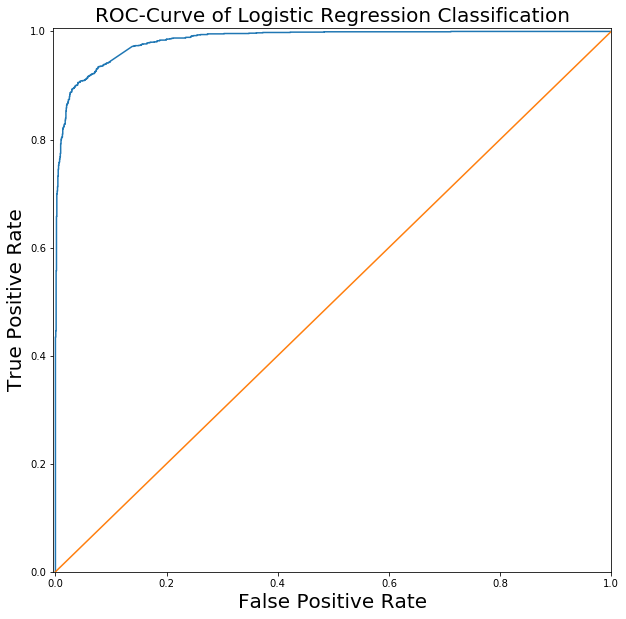

============================Predict LSI_mindf5 data==============================
Classification report:
             precision    recall  f1-score   support

   Com Tech       0.90      0.97      0.93      1590
    Rec Act       0.97      0.89      0.93      1560

avg / total       0.93      0.93      0.93      3150


Confusion Matrix:
[[1544   46]
 [ 172 1388]]

Total accuracy: 
0.930793650794


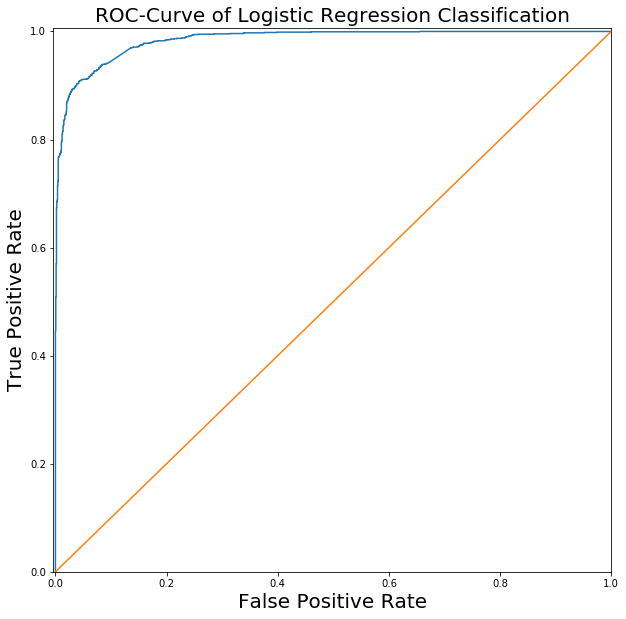

============================Predict NMF_mindf2 data==============================
Classification report:
             precision    recall  f1-score   support

   Com Tech       0.85      0.95      0.90      1590
    Rec Act       0.94      0.83      0.88      1560

avg / total       0.89      0.89      0.89      3150


Confusion Matrix:
[[1510   80]
 [ 270 1290]]

Total accuracy: 
0.888888888889


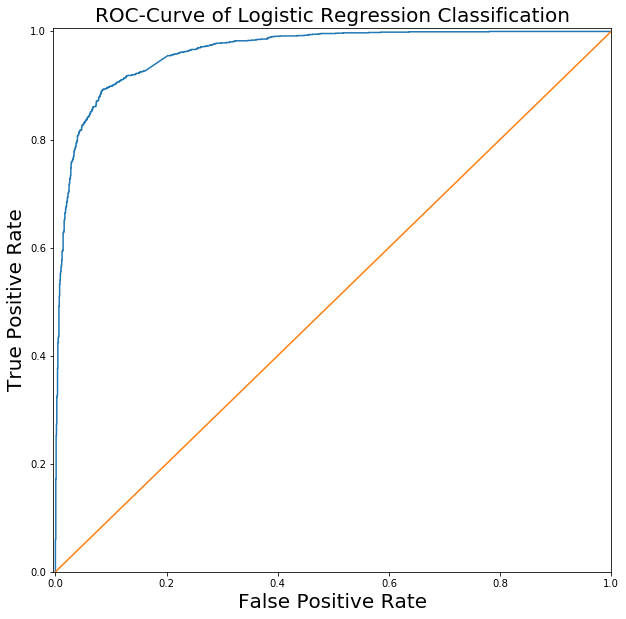

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.datasets import fetch_20newsgroups
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn import metrics
from sklearn import svm
from sklearn.linear_model import LogisticRegression
import re


#=================================Obtain data==================================
computer_technology_subclasses = ['comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware']
recreational_activity_subclasses = ['rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey']
  
comp_tech_train = fetch_20newsgroups(subset='train', categories=computer_technology_subclasses, shuffle=True, random_state=42, remove=('headers', 'footers', 'quotes'))
rec_act_train = fetch_20newsgroups(subset='train', categories=recreational_activity_subclasses, shuffle=True, random_state=42, remove=('headers', 'footers', 'quotes'))
comp_tech_test = fetch_20newsgroups(subset='test', categories=computer_technology_subclasses, shuffle=True, random_state=42, remove=('headers', 'footers', 'quotes'))
rec_act_test = fetch_20newsgroups(subset='test', categories=recreational_activity_subclasses, shuffle=True, random_state=42, remove=('headers', 'footers', 'quotes'))

all_data = comp_tech_train.data+comp_tech_test.data+rec_act_train.data+rec_act_test.data

stemmer = SnowballStemmer("english")

classification_train = [1] * len(comp_tech_train.data) + [-1] * len(rec_act_train.data)
classification_test = [1] * len(comp_tech_test.data) + [-1] * len(rec_act_test.data)
#==============================================================================




#===================Remove Punctuation & Stem & Stop Words=====================
punctuations = '[! \" # $ % \& \' \( \) \* + , \- \. \/ : ; < = > ? @ \[ \\ \] ^ _ ` { \| } ~]'
def remove_punctuation_and_stem(data_list):
    for i in range(len(data_list)):
        data_list[i] = " ".join([stemmer.stem(data) for data in re.split(punctuations, data_list[i])])
        data_list[i] = data_list[i].replace('\n','').replace('\t','').replace('\r','')

remove_punctuation_and_stem(all_data)



# TF-IDF matrix for min_df = 2 and min_df = 5
count_vect_mindf2 = CountVectorizer(min_df=2, stop_words ='english')
count_vect_mindf5 = CountVectorizer(min_df=5, stop_words ='english')

X_counts_mindf2 = count_vect_mindf2.fit_transform(all_data)
X_counts_mindf5 = count_vect_mindf5.fit_transform(all_data)

#================================Feature Extraction==========================================

tfidf_transformer = TfidfTransformer()

X_tfidf_mindf2 = tfidf_transformer.fit_transform(X_counts_mindf2)
X_tfidf_mindf5 = tfidf_transformer.fit_transform(X_counts_mindf5)


# Get the LSI matrix for training sets in 8 classes

svd = TruncatedSVD(n_components = 50, n_iter = 10,random_state = 42)
# LSI -> mindf = 2
svd.fit(X_tfidf_mindf2)
LSI_mindf2 = svd.transform(X_tfidf_mindf2)
# LSI -> mindf = 5
svd.fit(X_tfidf_mindf5)
LSI_mindf5 = svd.transform(X_tfidf_mindf5)

# Get the NMF matrix

nmf = NMF(n_components = 50, max_iter = 10,random_state = 42)
# NMF -> mindf = 2
nmf.fit(X_tfidf_mindf2)
NMF_mindf2 = nmf.transform(X_tfidf_mindf2)
#==============================================================================

#======================Split training and testing data=========================
split_point_1 = len(comp_tech_train.data)
split_point_2 = split_point_1 + len(comp_tech_test.data)
split_point_3 = split_point_2 + len(rec_act_train.data)

# split mindf2 LSI data
LSI_mindf2_test = np.concatenate((LSI_mindf2[split_point_1 : split_point_2], LSI_mindf2[split_point_3:]))
LSI_mindf2_train = np.concatenate((LSI_mindf2[0:split_point_1], LSI_mindf2[split_point_2:split_point_3]))

# split mindf5 LSI data
LSI_mindf5_test = np.concatenate((LSI_mindf5[split_point_1 : split_point_2], LSI_mindf5[split_point_3:]))
LSI_mindf5_train = np.concatenate((LSI_mindf5[0:split_point_1], LSI_mindf5[split_point_2:split_point_3]))

# split mindf2 NMF data
NMF_mindf2_test = np.concatenate((NMF_mindf2[split_point_1 : split_point_2], NMF_mindf2[split_point_3:]))
NMF_mindf2_train = np.concatenate((NMF_mindf2[0:split_point_1], NMF_mindf2[split_point_2:split_point_3]))
#==============================================================================




print('============================Predict LSI_mindf2 data==============================')
classifier = LogisticRegression()
classifier.fit(LSI_mindf2_train, classification_train)

predicted_class = classifier.predict(LSI_mindf2_test)
actual_class = classification_test
predict_probability = classifier.predict_proba(LSI_mindf2_test[:])[:,1]


print ('Classification report:')
print ('=======================================================')
print (metrics.classification_report(actual_class, predicted_class, target_names=["Com Tech","Rec Act"]))
print ('=======================================================\n')

print ('Confusion Matrix:')
print ('==============')
print (metrics.confusion_matrix(actual_class, predicted_class)) 
print ('==============\n')

print ('Total accuracy: ')
print (np.mean(actual_class == predicted_class))


fpr, tpr, threshold = roc_curve(actual_class, predict_probability)
line = [0, 1]
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1])
plt.ylabel('True Positive Rate', fontsize = 20)
plt.xlabel('False Positive Rate', fontsize = 20)
plt.title('ROC-Curve of Logistic Regression Classification', fontsize = 20)
plt.axis([-0.004, 1, 0, 1.006])
plt.show()
#==============================================================================

print('============================Predict LSI_mindf5 data==============================')
classifier = LogisticRegression()
classifier.fit(LSI_mindf5_train, classification_train)

predicted_class = classifier.predict(LSI_mindf5_test)
actual_class = classification_test
predict_probability = classifier.predict_proba(LSI_mindf5_test[:])[:,1]


print ('Classification report:')
print ('=======================================================')
print (metrics.classification_report(actual_class, predicted_class, target_names=["Com Tech","Rec Act"]))
print ('=======================================================\n')

print ('Confusion Matrix:')
print ('==============')
print (metrics.confusion_matrix(actual_class, predicted_class)) 
print ('==============\n')

print ('Total accuracy: ')
print (np.mean(actual_class == predicted_class))


fpr, tpr, threshold = roc_curve(actual_class, predict_probability)
line = [0, 1]
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1])
plt.ylabel('True Positive Rate', fontsize = 20)
plt.xlabel('False Positive Rate', fontsize = 20)
plt.title('ROC-Curve of Logistic Regression Classification', fontsize = 20)
plt.axis([-0.004, 1, 0, 1.006])
plt.show()
#==============================================================================


print('============================Predict NMF_mindf2 data==============================')
classifier = LogisticRegression()
classifier.fit(NMF_mindf2_train, classification_train)

predicted_class = classifier.predict(NMF_mindf2_test)
actual_class = classification_test
predict_probability = classifier.predict_proba(NMF_mindf2_test[:])[:,1]


print ('Classification report:')
print ('=======================================================')
print (metrics.classification_report(actual_class, predicted_class, target_names=["Com Tech","Rec Act"]))
print ('=======================================================\n')

print ('Confusion Matrix:')
print ('==============')
print (metrics.confusion_matrix(actual_class, predicted_class)) 
print ('==============\n')

print ('Total accuracy: ')
print (np.mean(actual_class == predicted_class))


fpr, tpr, threshold = roc_curve(actual_class, predict_probability)
line = [0, 1]
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1])
plt.ylabel('True Positive Rate', fontsize = 20)
plt.xlabel('False Positive Rate', fontsize = 20)
plt.title('ROC-Curve of Logistic Regression Classification', fontsize = 20)
plt.axis([-0.004, 1, 0, 1.006])
plt.show()
#==============================================================================

## Problem i:

#============================Predict LSI_mindf2 data==============================
########################################
#                                      #
# PENALTY TYPE: l1 norm regularization #
#                                      #
# REGULARIZATION TERM: 0.0001          #
########################################

                Classification report:
             precision    recall  f1-score   support

   Com Tech       0.50      1.00      0.67      1590
    Rec Act       0.00      0.00      0.00      1560

avg / total       0.25      0.50      0.34      3150


Confusion Matrix:
[[1590    0]
 [1560    0]]

Total accuracy: 
0.504761904762


/Users/dui/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


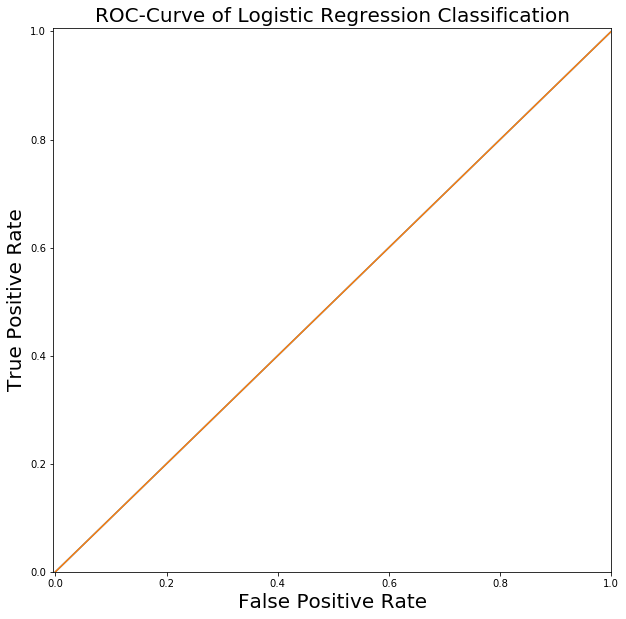






########################################
#                                      #
# PENALTY TYPE: l2 norm regularization #
#                                      #
# REGULARIZATION TERM: 0.0001          #
########################################

                Classification report:
             precision    recall  f1-score   support

   Com Tech       0.54      1.00      0.70      1590
    Rec Act       1.00      0.12      0.21      1560

avg / total       0.77      0.56      0.46      3150


Confusion Matrix:
[[1590    0]
 [1373  187]]

Total accuracy: 
0.564126984127


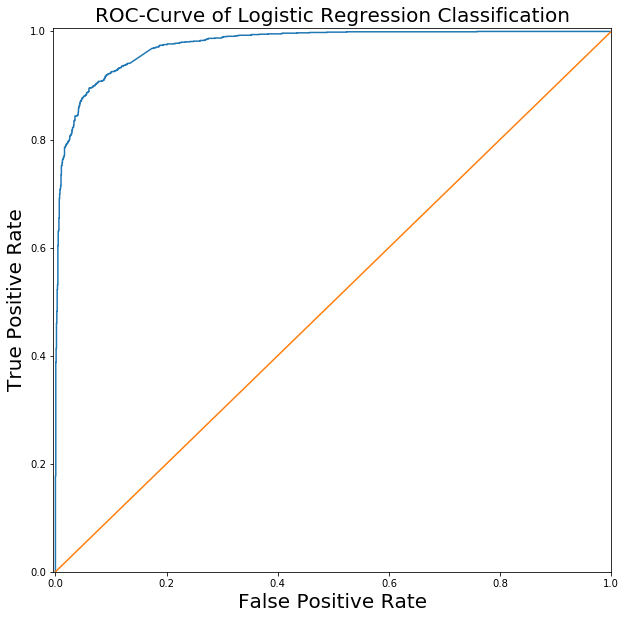






########################################
#                                      #
# PENALTY TYPE: l1 norm regularization #
#                                      #
# REGULARIZATION TERM: 0.001           #
########################################

                Classification report:
             precision    recall  f1-score   support

   Com Tech       0.50      1.00      0.67      1590
    Rec Act       0.00      0.00      0.00      1560

avg / total       0.25      0.50      0.34      3150


Confusion Matrix:
[[1590    0]
 [1560    0]]

Total accuracy: 
0.504761904762


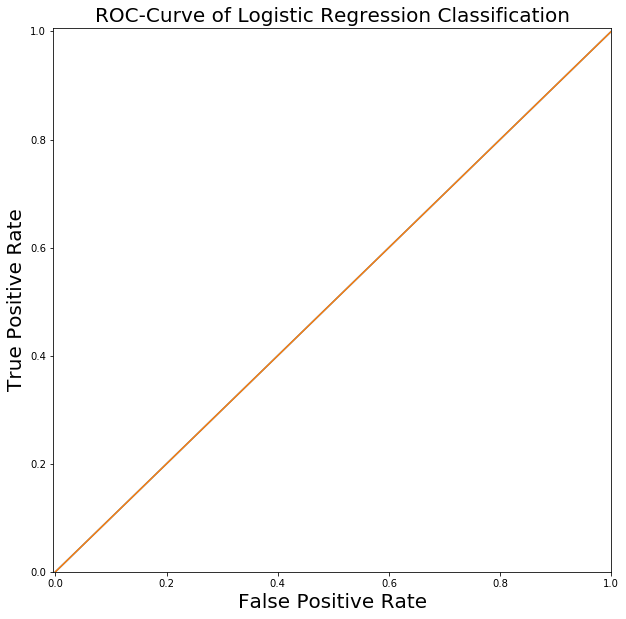






########################################
#                                      #
# PENALTY TYPE: l2 norm regularization #
#                                      #
# REGULARIZATION TERM: 0.001           #
########################################

                Classification report:
             precision    recall  f1-score   support

   Com Tech       0.65      1.00      0.79      1590
    Rec Act       1.00      0.44      0.61      1560

avg / total       0.82      0.72      0.70      3150


Confusion Matrix:
[[1587    3]
 [ 866  694]]

Total accuracy: 
0.724126984127


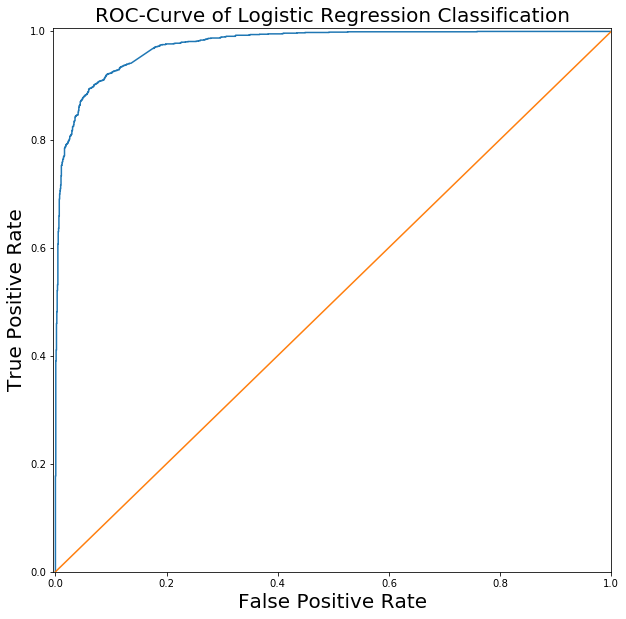






########################################
#                                      #
# PENALTY TYPE: l1 norm regularization #
#                                      #
# REGULARIZATION TERM: 0.01            #
########################################

                Classification report:
             precision    recall  f1-score   support

   Com Tech       0.84      0.93      0.89      1590
    Rec Act       0.92      0.82      0.87      1560

avg / total       0.88      0.88      0.88      3150


Confusion Matrix:
[[1483  107]
 [ 274 1286]]

Total accuracy: 
0.879047619048


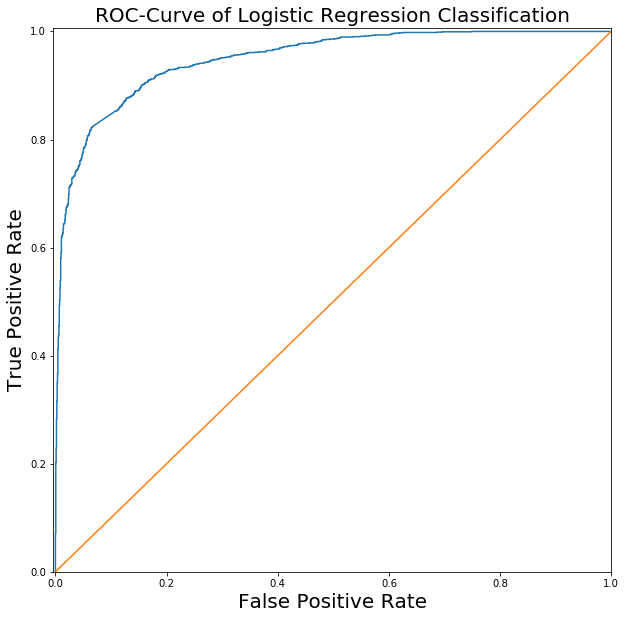






########################################
#                                      #
# PENALTY TYPE: l2 norm regularization #
#                                      #
# REGULARIZATION TERM: 0.01            #
########################################

                Classification report:
             precision    recall  f1-score   support

   Com Tech       0.82      0.98      0.89      1590
    Rec Act       0.98      0.78      0.87      1560

avg / total       0.90      0.88      0.88      3150


Confusion Matrix:
[[1564   26]
 [ 343 1217]]

Total accuracy: 
0.882857142857


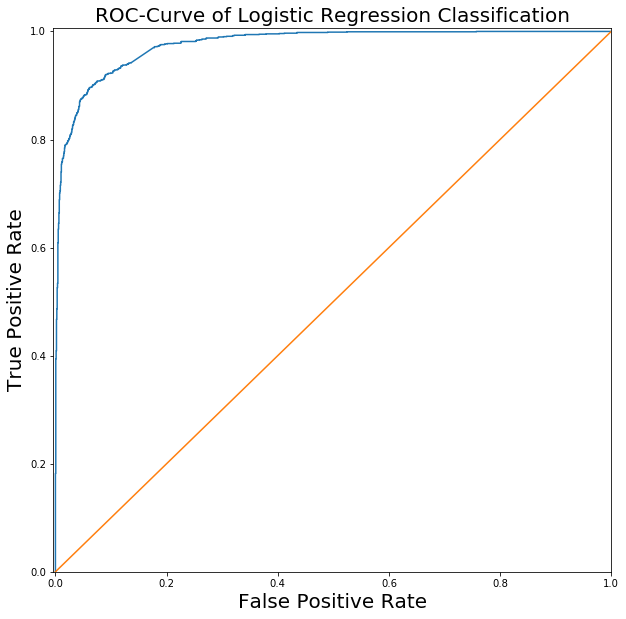






########################################
#                                      #
# PENALTY TYPE: l1 norm regularization #
#                                      #
# REGULARIZATION TERM: 0.1             #
########################################

                Classification report:
             precision    recall  f1-score   support

   Com Tech       0.87      0.94      0.90      1590
    Rec Act       0.93      0.86      0.89      1560

avg / total       0.90      0.90      0.90      3150


Confusion Matrix:
[[1489  101]
 [ 217 1343]]

Total accuracy: 
0.899047619048


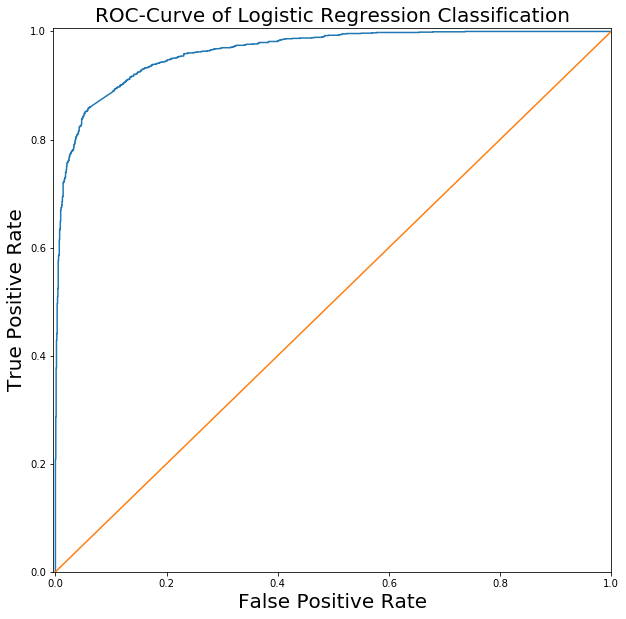






########################################
#                                      #
# PENALTY TYPE: l2 norm regularization #
#                                      #
# REGULARIZATION TERM: 0.1             #
########################################

                Classification report:
             precision    recall  f1-score   support

   Com Tech       0.86      0.97      0.91      1590
    Rec Act       0.96      0.84      0.90      1560

avg / total       0.91      0.91      0.91      3150


Confusion Matrix:
[[1541   49]
 [ 245 1315]]

Total accuracy: 
0.906666666667


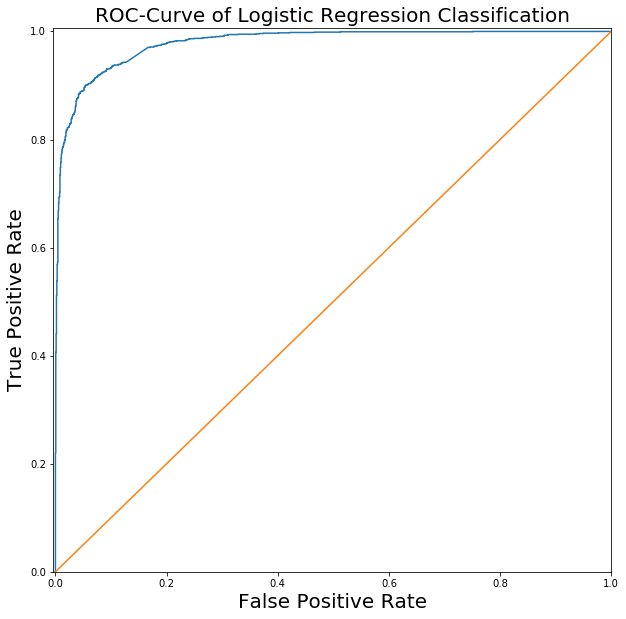






########################################
#                                      #
# PENALTY TYPE: l1 norm regularization #
#                                      #
# REGULARIZATION TERM: 1               #
########################################

                Classification report:
             precision    recall  f1-score   support

   Com Tech       0.91      0.96      0.94      1590
    Rec Act       0.96      0.90      0.93      1560

avg / total       0.94      0.93      0.93      3150


Confusion Matrix:
[[1533   57]
 [ 149 1411]]

Total accuracy: 
0.934603174603


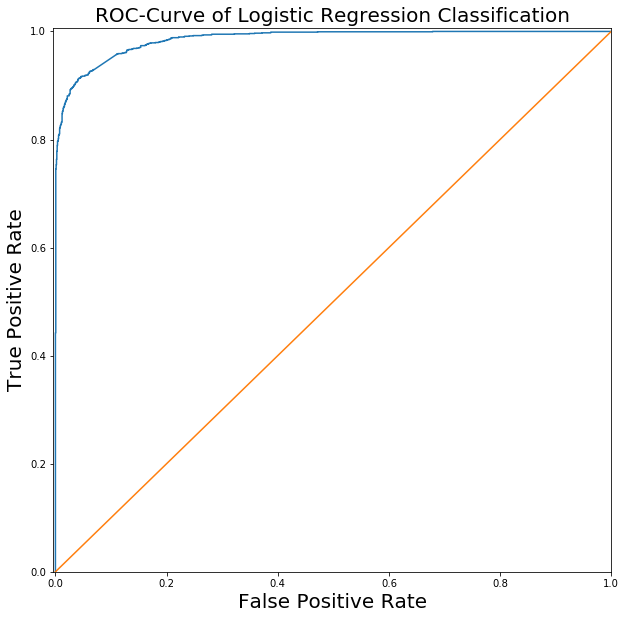






########################################
#                                      #
# PENALTY TYPE: l2 norm regularization #
#                                      #
# REGULARIZATION TERM: 1               #
########################################

                Classification report:
             precision    recall  f1-score   support

   Com Tech       0.90      0.97      0.93      1590
    Rec Act       0.97      0.89      0.93      1560

avg / total       0.93      0.93      0.93      3150


Confusion Matrix:
[[1546   44]
 [ 176 1384]]

Total accuracy: 
0.930158730159


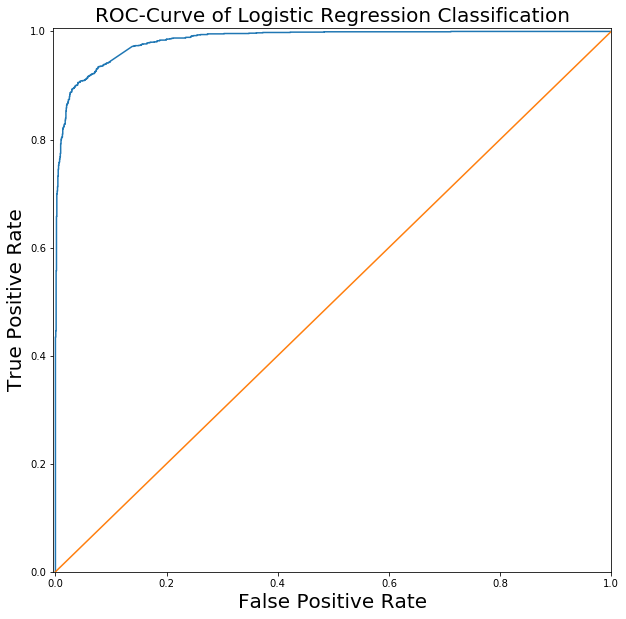

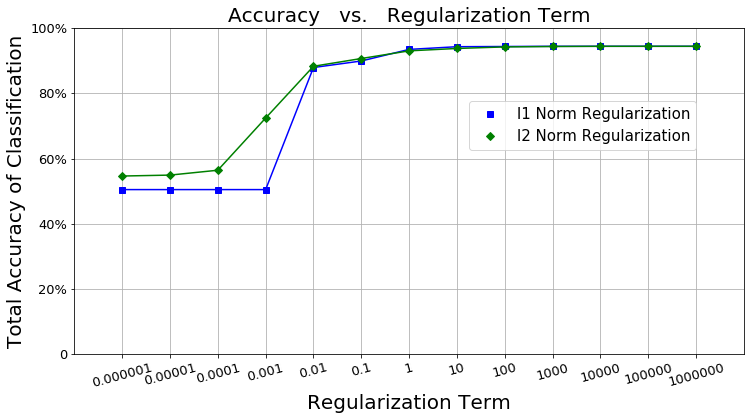

#============================Predict LSI_mindf5 data==============================
########################################
#                                      #
# PENALTY TYPE: l1 norm regularization #
#                                      #
# REGULARIZATION TERM: 0.0001          #
########################################

                Classification report:
             precision    recall  f1-score   support

   Com Tech       0.50      1.00      0.67      1590
    Rec Act       0.00      0.00      0.00      1560

avg / total       0.25      0.50      0.34      3150


Confusion Matrix:
[[1590    0]
 [1560    0]]

Total accuracy: 
0.504761904762


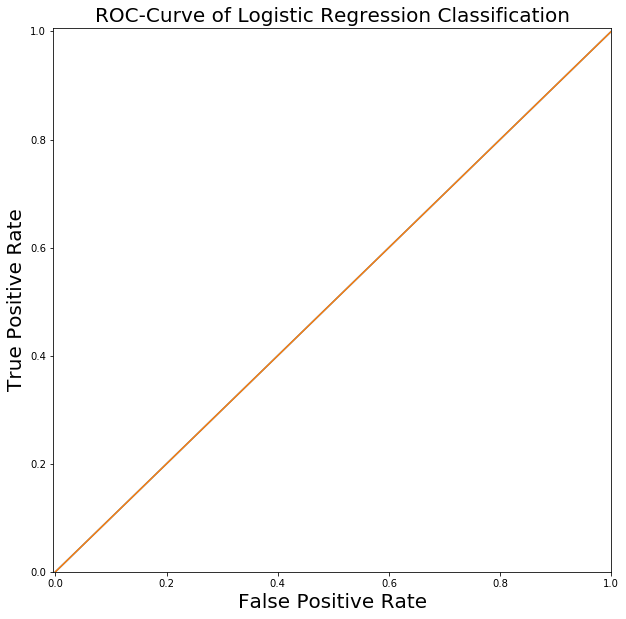






########################################
#                                      #
# PENALTY TYPE: l2 norm regularization #
#                                      #
# REGULARIZATION TERM: 0.0001          #
########################################

                Classification report:
             precision    recall  f1-score   support

   Com Tech       0.55      1.00      0.71      1590
    Rec Act       1.00      0.17      0.29      1560

avg / total       0.77      0.59      0.50      3150


Confusion Matrix:
[[1590    0]
 [1292  268]]

Total accuracy: 
0.589841269841


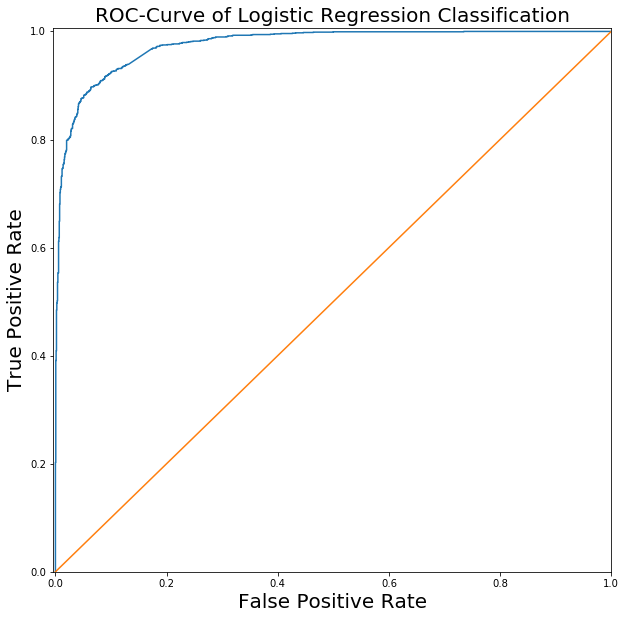






########################################
#                                      #
# PENALTY TYPE: l1 norm regularization #
#                                      #
# REGULARIZATION TERM: 0.001           #
########################################

                Classification report:
             precision    recall  f1-score   support

   Com Tech       0.50      1.00      0.67      1590
    Rec Act       0.00      0.00      0.00      1560

avg / total       0.25      0.50      0.34      3150


Confusion Matrix:
[[1590    0]
 [1560    0]]

Total accuracy: 
0.504761904762


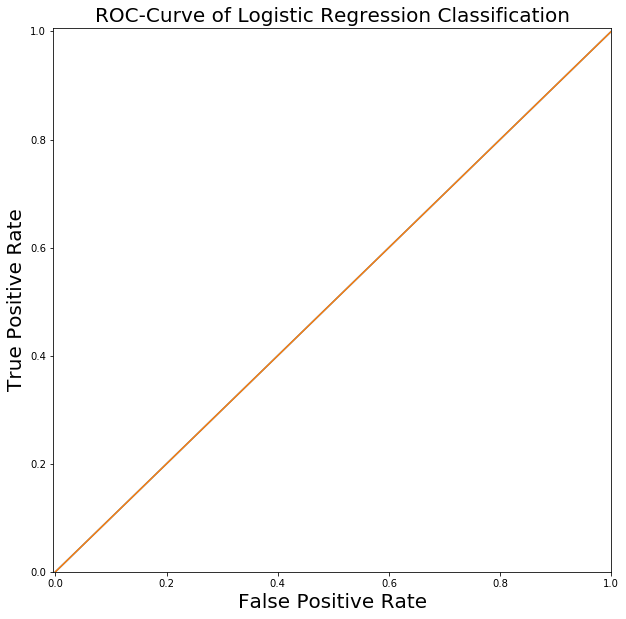






########################################
#                                      #
# PENALTY TYPE: l2 norm regularization #
#                                      #
# REGULARIZATION TERM: 0.001           #
########################################

                Classification report:
             precision    recall  f1-score   support

   Com Tech       0.67      1.00      0.80      1590
    Rec Act       0.99      0.51      0.67      1560

avg / total       0.83      0.75      0.74      3150


Confusion Matrix:
[[1584    6]
 [ 766  794]]

Total accuracy: 
0.754920634921


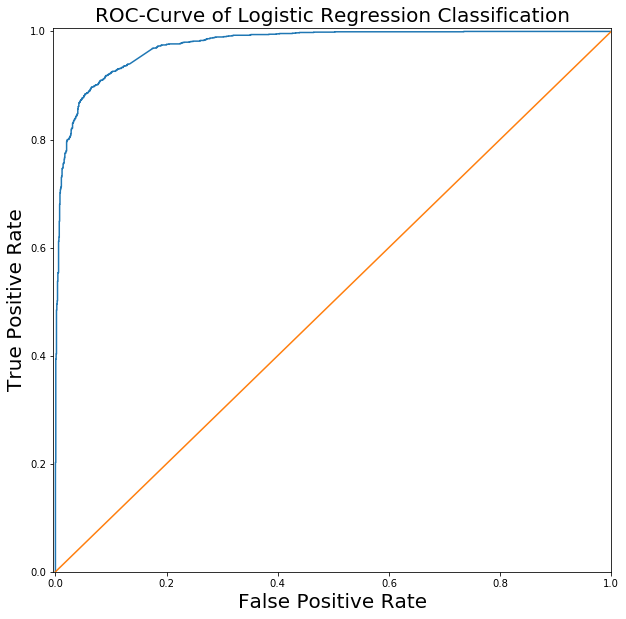






########################################
#                                      #
# PENALTY TYPE: l1 norm regularization #
#                                      #
# REGULARIZATION TERM: 0.01            #
########################################

                Classification report:
             precision    recall  f1-score   support

   Com Tech       0.84      0.93      0.89      1590
    Rec Act       0.92      0.82      0.87      1560

avg / total       0.88      0.88      0.88      3150


Confusion Matrix:
[[1483  107]
 [ 278 1282]]

Total accuracy: 
0.877777777778


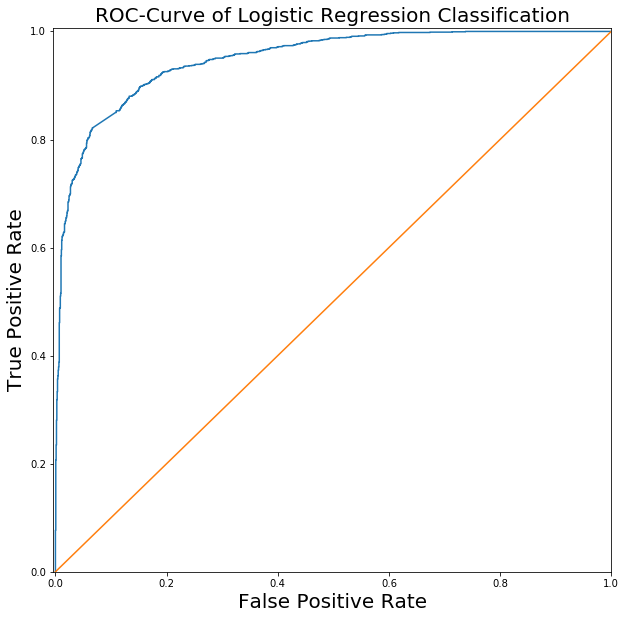






########################################
#                                      #
# PENALTY TYPE: l2 norm regularization #
#                                      #
# REGULARIZATION TERM: 0.01            #
########################################

                Classification report:
             precision    recall  f1-score   support

   Com Tech       0.83      0.98      0.90      1590
    Rec Act       0.97      0.79      0.87      1560

avg / total       0.90      0.89      0.89      3150


Confusion Matrix:
[[1558   32]
 [ 322 1238]]

Total accuracy: 
0.887619047619


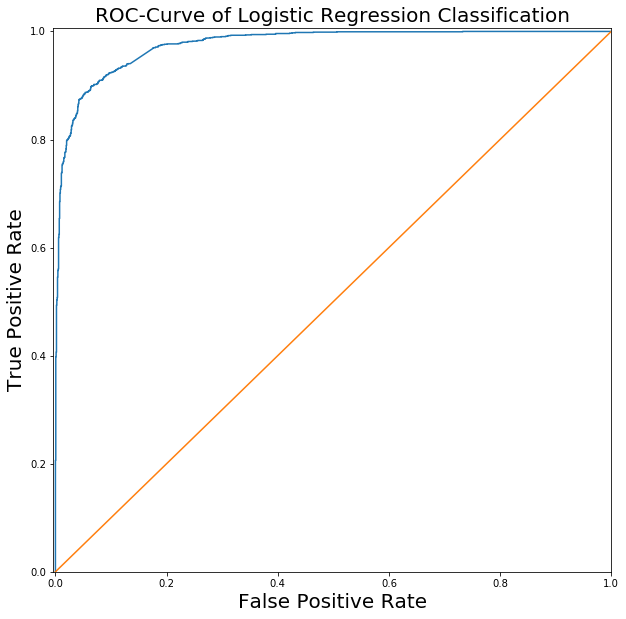






########################################
#                                      #
# PENALTY TYPE: l1 norm regularization #
#                                      #
# REGULARIZATION TERM: 0.1             #
########################################

                Classification report:
             precision    recall  f1-score   support

   Com Tech       0.88      0.94      0.91      1590
    Rec Act       0.93      0.86      0.90      1560

avg / total       0.90      0.90      0.90      3150


Confusion Matrix:
[[1493   97]
 [ 212 1348]]

Total accuracy: 
0.901904761905


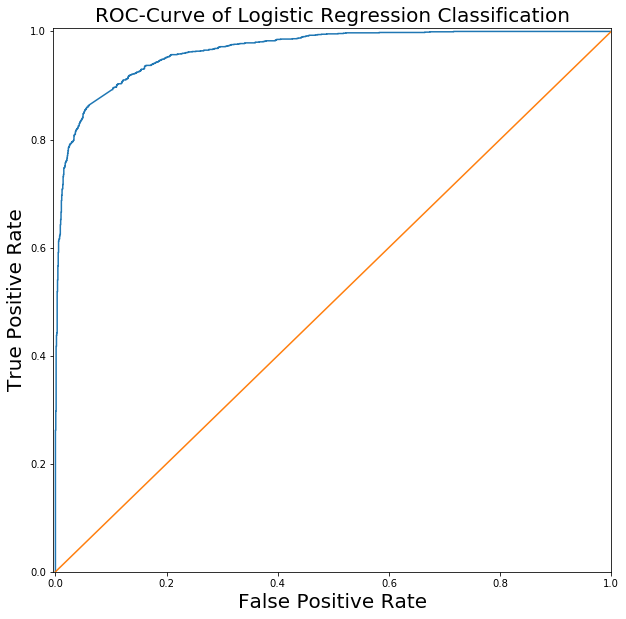






########################################
#                                      #
# PENALTY TYPE: l2 norm regularization #
#                                      #
# REGULARIZATION TERM: 0.1             #
########################################

                Classification report:
             precision    recall  f1-score   support

   Com Tech       0.87      0.97      0.92      1590
    Rec Act       0.96      0.85      0.90      1560

avg / total       0.92      0.91      0.91      3150


Confusion Matrix:
[[1541   49]
 [ 236 1324]]

Total accuracy: 
0.909523809524


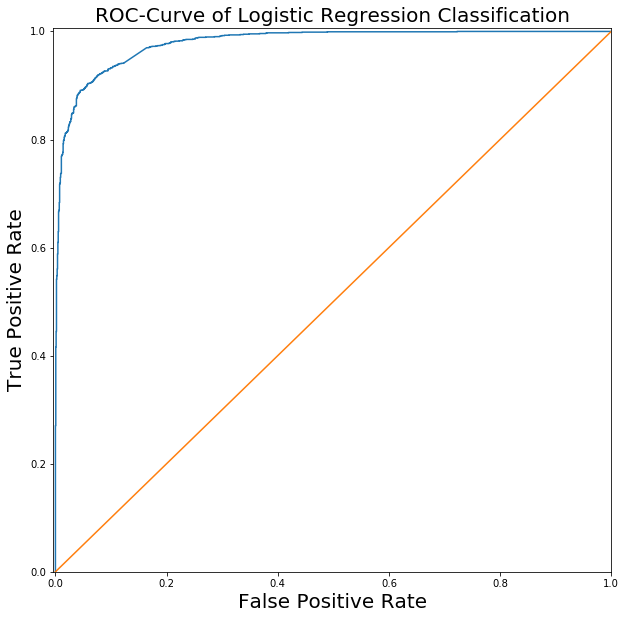






########################################
#                                      #
# PENALTY TYPE: l1 norm regularization #
#                                      #
# REGULARIZATION TERM: 1               #
########################################

                Classification report:
             precision    recall  f1-score   support

   Com Tech       0.91      0.96      0.94      1590
    Rec Act       0.96      0.91      0.93      1560

avg / total       0.94      0.93      0.93      3150


Confusion Matrix:
[[1532   58]
 [ 147 1413]]

Total accuracy: 
0.934920634921


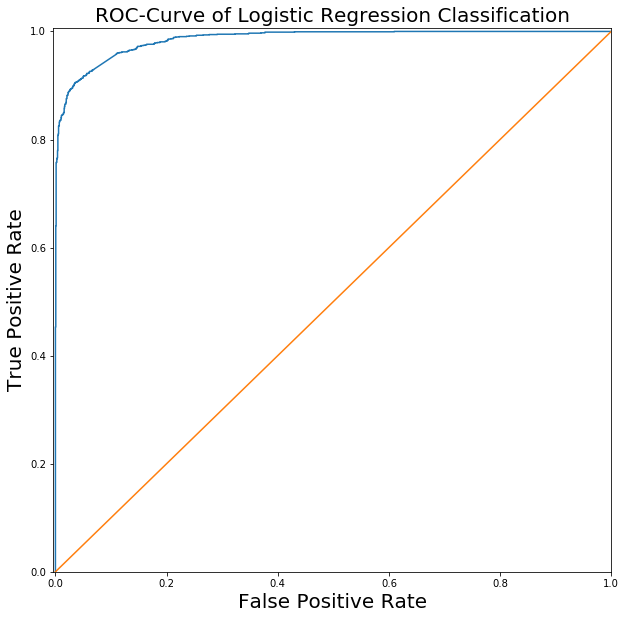






########################################
#                                      #
# PENALTY TYPE: l2 norm regularization #
#                                      #
# REGULARIZATION TERM: 1               #
########################################

                Classification report:
             precision    recall  f1-score   support

   Com Tech       0.90      0.97      0.93      1590
    Rec Act       0.97      0.89      0.93      1560

avg / total       0.93      0.93      0.93      3150


Confusion Matrix:
[[1544   46]
 [ 172 1388]]

Total accuracy: 
0.930793650794


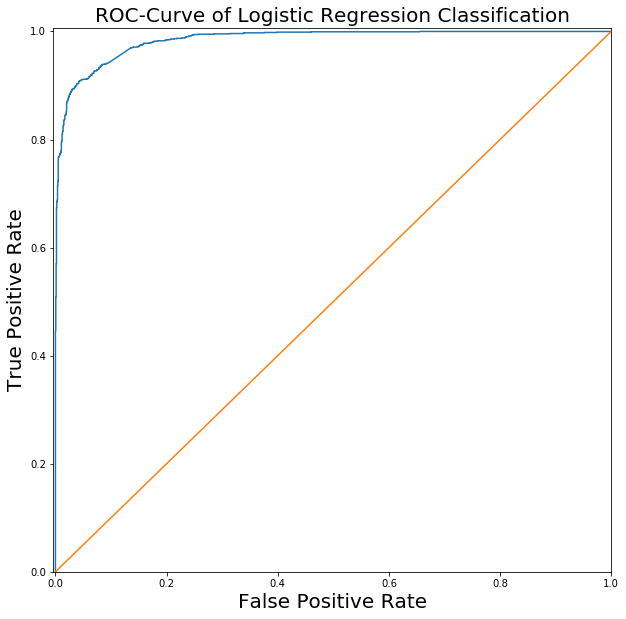

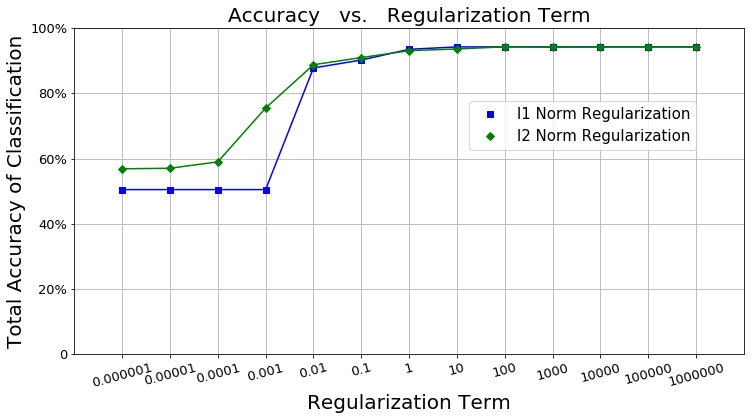

#============================Predict NMF_mindf2 data==============================
########################################
#                                      #
# PENALTY TYPE: l1 norm regularization #
#                                      #
# REGULARIZATION TERM: 0.0001          #
########################################

                Classification report:
             precision    recall  f1-score   support

   Com Tech       0.50      1.00      0.67      1590
    Rec Act       0.00      0.00      0.00      1560

avg / total       0.25      0.50      0.34      3150


Confusion Matrix:
[[1590    0]
 [1560    0]]

Total accuracy: 
0.504761904762


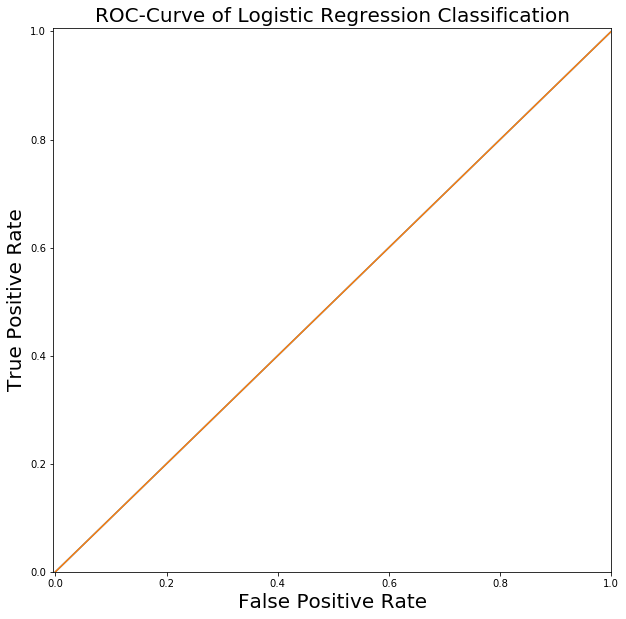






########################################
#                                      #
# PENALTY TYPE: l2 norm regularization #
#                                      #
# REGULARIZATION TERM: 0.0001          #
########################################

                Classification report:
             precision    recall  f1-score   support

   Com Tech       0.50      1.00      0.67      1590
    Rec Act       0.00      0.00      0.00      1560

avg / total       0.25      0.50      0.34      3150


Confusion Matrix:
[[1590    0]
 [1560    0]]

Total accuracy: 
0.504761904762


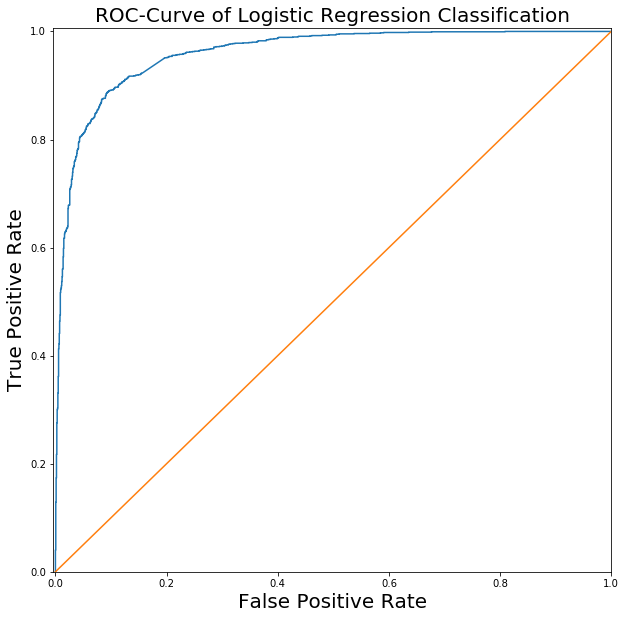






########################################
#                                      #
# PENALTY TYPE: l1 norm regularization #
#                                      #
# REGULARIZATION TERM: 0.001           #
########################################

                Classification report:
             precision    recall  f1-score   support

   Com Tech       0.50      1.00      0.67      1590
    Rec Act       0.00      0.00      0.00      1560

avg / total       0.25      0.50      0.34      3150


Confusion Matrix:
[[1590    0]
 [1560    0]]

Total accuracy: 
0.504761904762


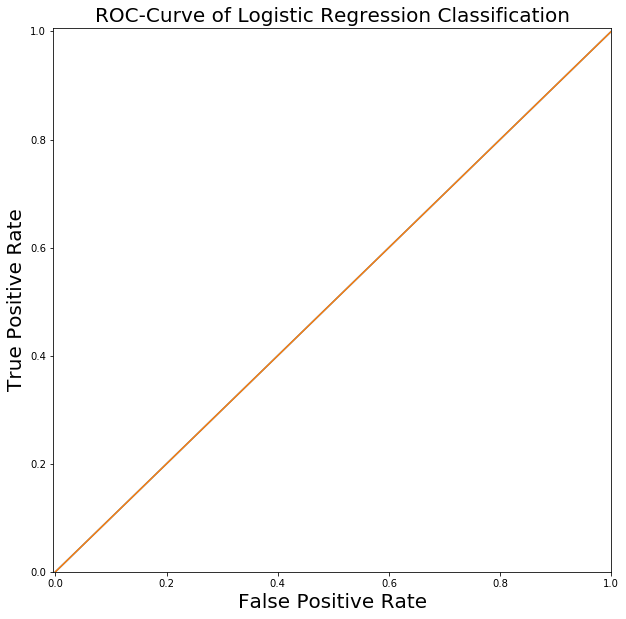






########################################
#                                      #
# PENALTY TYPE: l2 norm regularization #
#                                      #
# REGULARIZATION TERM: 0.001           #
########################################

                Classification report:
             precision    recall  f1-score   support

   Com Tech       0.50      1.00      0.67      1590
    Rec Act       0.00      0.00      0.00      1560

avg / total       0.25      0.50      0.34      3150


Confusion Matrix:
[[1590    0]
 [1560    0]]

Total accuracy: 
0.504761904762


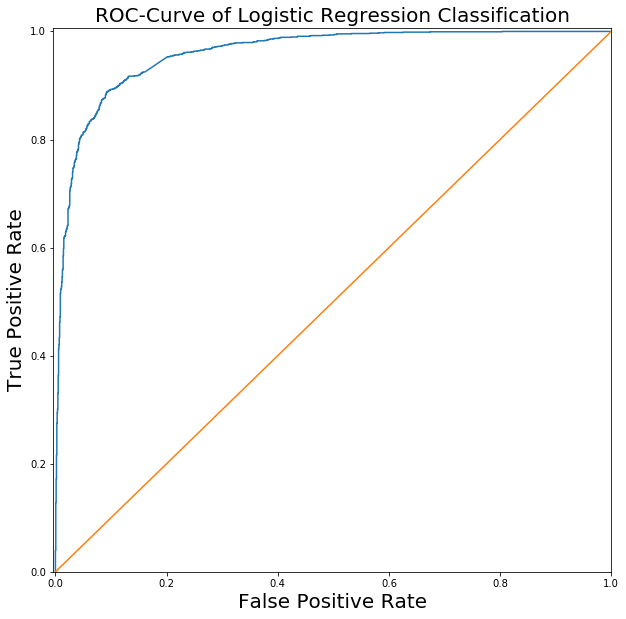






########################################
#                                      #
# PENALTY TYPE: l1 norm regularization #
#                                      #
# REGULARIZATION TERM: 0.01            #
########################################

                Classification report:
             precision    recall  f1-score   support

   Com Tech       0.50      1.00      0.67      1590
    Rec Act       0.00      0.00      0.00      1560

avg / total       0.25      0.50      0.34      3150


Confusion Matrix:
[[1590    0]
 [1560    0]]

Total accuracy: 
0.504761904762


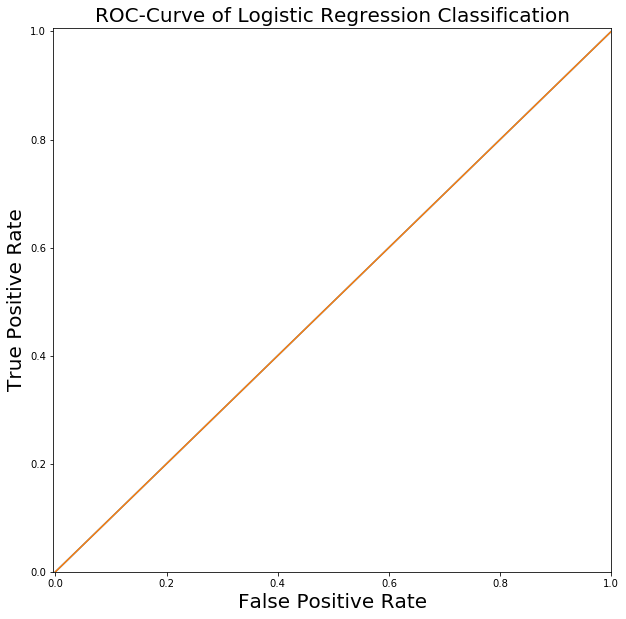






########################################
#                                      #
# PENALTY TYPE: l2 norm regularization #
#                                      #
# REGULARIZATION TERM: 0.01            #
########################################

                Classification report:
             precision    recall  f1-score   support

   Com Tech       0.51      1.00      0.67      1590
    Rec Act       1.00      0.02      0.03      1560

avg / total       0.75      0.51      0.36      3150


Confusion Matrix:
[[1590    0]
 [1535   25]]

Total accuracy: 
0.512698412698


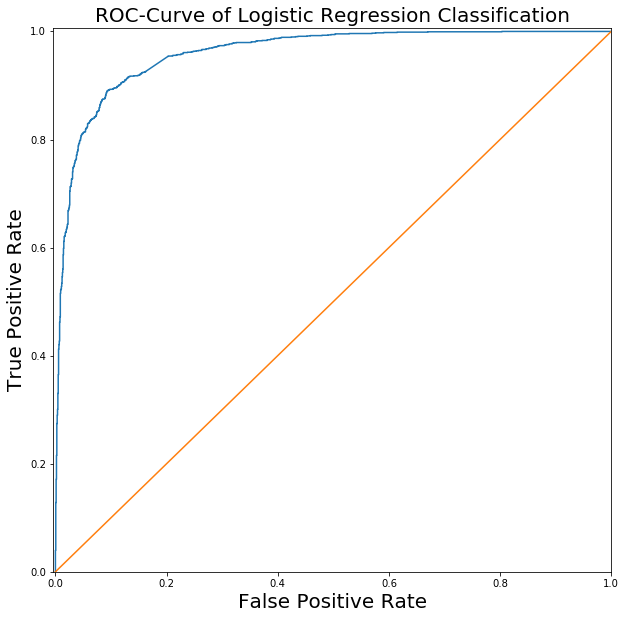






########################################
#                                      #
# PENALTY TYPE: l1 norm regularization #
#                                      #
# REGULARIZATION TERM: 0.1             #
########################################

                Classification report:
             precision    recall  f1-score   support

   Com Tech       0.50      1.00      0.67      1590
    Rec Act       0.00      0.00      0.00      1560

avg / total       0.25      0.50      0.34      3150


Confusion Matrix:
[[1590    0]
 [1560    0]]

Total accuracy: 
0.504761904762


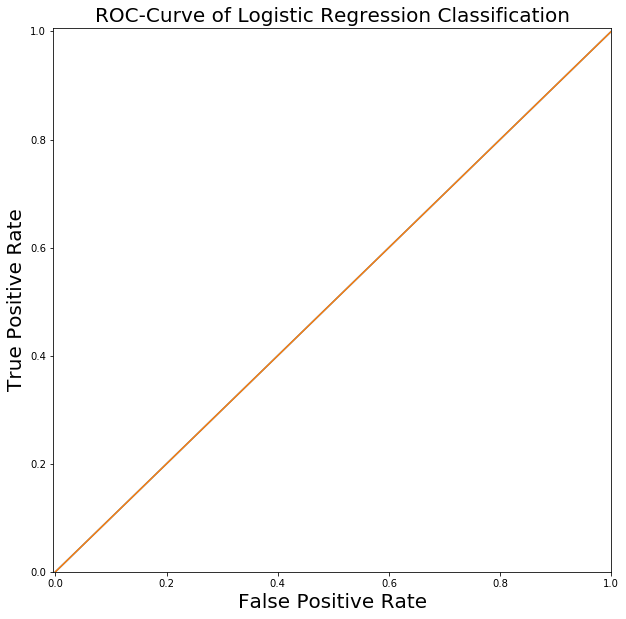






########################################
#                                      #
# PENALTY TYPE: l2 norm regularization #
#                                      #
# REGULARIZATION TERM: 0.1             #
########################################

                Classification report:
             precision    recall  f1-score   support

   Com Tech       0.77      0.97      0.86      1590
    Rec Act       0.96      0.71      0.81      1560

avg / total       0.87      0.84      0.84      3150


Confusion Matrix:
[[1549   41]
 [ 460 1100]]

Total accuracy: 
0.840952380952


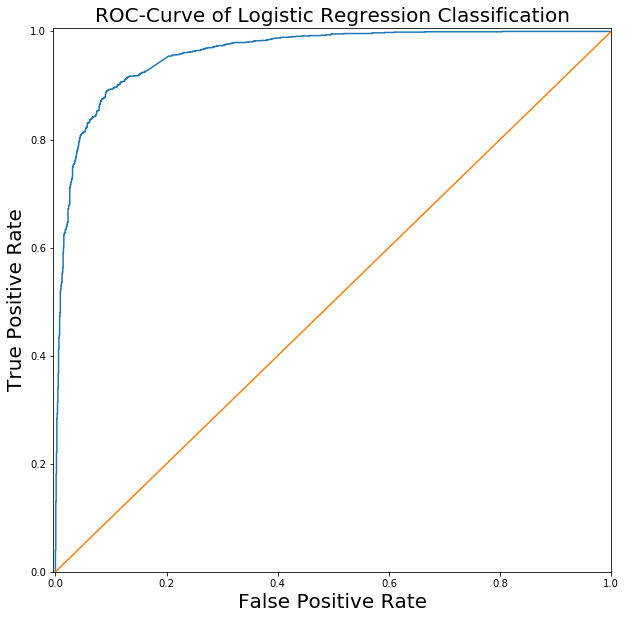






########################################
#                                      #
# PENALTY TYPE: l1 norm regularization #
#                                      #
# REGULARIZATION TERM: 1               #
########################################

                Classification report:
             precision    recall  f1-score   support

   Com Tech       0.90      0.96      0.93      1590
    Rec Act       0.96      0.89      0.92      1560

avg / total       0.93      0.93      0.93      3150


Confusion Matrix:
[[1526   64]
 [ 164 1396]]

Total accuracy: 
0.927619047619


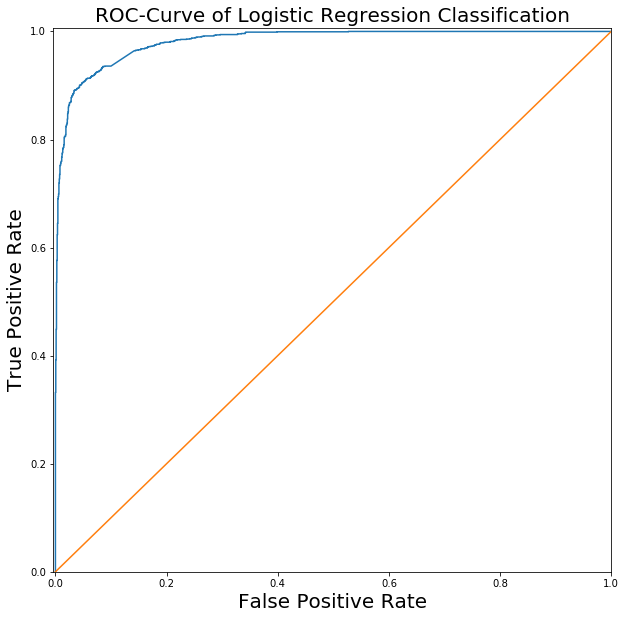






########################################
#                                      #
# PENALTY TYPE: l2 norm regularization #
#                                      #
# REGULARIZATION TERM: 1               #
########################################

                Classification report:
             precision    recall  f1-score   support

   Com Tech       0.85      0.95      0.90      1590
    Rec Act       0.94      0.83      0.88      1560

avg / total       0.89      0.89      0.89      3150


Confusion Matrix:
[[1510   80]
 [ 270 1290]]

Total accuracy: 
0.888888888889


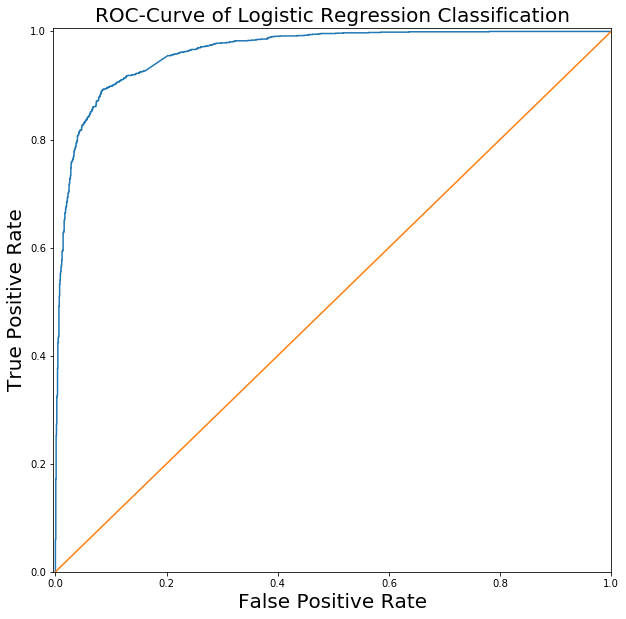

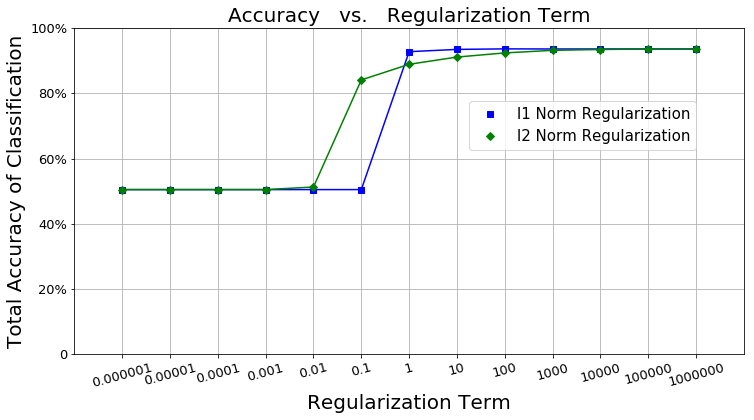

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.datasets import fetch_20newsgroups
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn import metrics
from sklearn import svm
from sklearn.linear_model import LogisticRegression
import re


#=================================Obtain data==================================
computer_technology_subclasses = ['comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware']
recreational_activity_subclasses = ['rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey']
  
comp_tech_train = fetch_20newsgroups(subset='train', categories=computer_technology_subclasses, shuffle=True, random_state=42, remove=('headers', 'footers', 'quotes'))
rec_act_train = fetch_20newsgroups(subset='train', categories=recreational_activity_subclasses, shuffle=True, random_state=42, remove=('headers', 'footers', 'quotes'))
comp_tech_test = fetch_20newsgroups(subset='test', categories=computer_technology_subclasses, shuffle=True, random_state=42, remove=('headers', 'footers', 'quotes'))
rec_act_test = fetch_20newsgroups(subset='test', categories=recreational_activity_subclasses, shuffle=True, random_state=42, remove=('headers', 'footers', 'quotes'))

all_data = comp_tech_train.data+comp_tech_test.data+rec_act_train.data+rec_act_test.data

stemmer = SnowballStemmer("english")

classification_train = [1] * len(comp_tech_train.data) + [-1] * len(rec_act_train.data)
classification_test = [1] * len(comp_tech_test.data) + [-1] * len(rec_act_test.data)
#==============================================================================




#===================Remove Punctuation & Stem & Stop Words=====================
punctuations = '[! \" # $ % \& \' \( \) \* + , \- \. \/ : ; < = > ? @ \[ \\ \] ^ _ ` { \| } ~]'
def remove_punctuation_and_stem(data_list):
    for i in range(len(data_list)):
        data_list[i] = " ".join([stemmer.stem(data) for data in re.split(punctuations, data_list[i])])
        data_list[i] = data_list[i].replace('\n','').replace('\t','').replace('\r','')

remove_punctuation_and_stem(all_data)



# TF-IDF matrix for min_df = 2 and min_df = 5
count_vect_mindf2 = CountVectorizer(min_df=2, stop_words ='english')
count_vect_mindf5 = CountVectorizer(min_df=5, stop_words ='english')

X_counts_mindf2 = count_vect_mindf2.fit_transform(all_data)
X_counts_mindf5 = count_vect_mindf5.fit_transform(all_data)

#================================Feature Extraction==========================================

tfidf_transformer = TfidfTransformer()

X_tfidf_mindf2 = tfidf_transformer.fit_transform(X_counts_mindf2)
X_tfidf_mindf5 = tfidf_transformer.fit_transform(X_counts_mindf5)


# Get the LSI matrix for training sets in 8 classes

svd = TruncatedSVD(n_components = 50, n_iter = 10,random_state = 42)
# LSI -> mindf = 2
svd.fit(X_tfidf_mindf2)
LSI_mindf2 = svd.transform(X_tfidf_mindf2)
# LSI -> mindf = 5
svd.fit(X_tfidf_mindf5)
LSI_mindf5 = svd.transform(X_tfidf_mindf5)

# Get the NMF matrix

nmf = NMF(n_components = 50, max_iter = 10,random_state = 42)
# NMF -> mindf = 2
nmf.fit(X_tfidf_mindf2)
NMF_mindf2 = nmf.transform(X_tfidf_mindf2)
#==============================================================================

#======================Split training and testing data=========================
split_point_1 = len(comp_tech_train.data)
split_point_2 = split_point_1 + len(comp_tech_test.data)
split_point_3 = split_point_2 + len(rec_act_train.data)

# split mindf2 LSI data
LSI_mindf2_test = np.concatenate((LSI_mindf2[split_point_1 : split_point_2], LSI_mindf2[split_point_3:]))
LSI_mindf2_train = np.concatenate((LSI_mindf2[0:split_point_1], LSI_mindf2[split_point_2:split_point_3]))

# split mindf5 LSI data
LSI_mindf5_test = np.concatenate((LSI_mindf5[split_point_1 : split_point_2], LSI_mindf5[split_point_3:]))
LSI_mindf5_train = np.concatenate((LSI_mindf5[0:split_point_1], LSI_mindf5[split_point_2:split_point_3]))

# split mindf2 NMF data
NMF_mindf2_test = np.concatenate((NMF_mindf2[split_point_1 : split_point_2], NMF_mindf2[split_point_3:]))
NMF_mindf2_train = np.concatenate((NMF_mindf2[0:split_point_1], NMF_mindf2[split_point_2:split_point_3]))
#==============================================================================


print('#============================Predict LSI_mindf2 data==============================')
def classify(regularization, penalization):
    classifier = LogisticRegression(C = regularization, penalty = penalization)
    classifier.fit(LSI_mindf2_train, classification_train)
    
    predicted_class = classifier.predict(LSI_mindf2_test)
    actual_class = classification_test
    predict_probability = classifier.predict_proba(LSI_mindf2_test[:])[:,1]
    
    
    # Only print details of these regularization terms
    if regularization >= 0.0001 and regularization <= 1:
        line1 = 'REGULARIZATION TERM: ' + str(regularization)
        line2 = 'PENALTY TYPE: ' + penalization +' norm regularization'
        spaces = ''
        for i in range(36-len(line1)):
            spaces += ' '
        print ('########################################')
        print ('#                                      #')
        print ('# ' + line2 + ' #')
        print ('#                                      #')
        print ('# ' + line1 + spaces + ' #')
        print ('########################################\n')
    
        print ('                Classification report:')
        print ('=======================================================')
        print (metrics.classification_report(actual_class, predicted_class, target_names=["Com Tech","Rec Act"]))
        print ('=======================================================\n')
        
        print ('Confusion Matrix:')
        print ('==============')
        print (metrics.confusion_matrix(actual_class, predicted_class))
        print ('==============\n')
        
        print ('Total accuracy: ')
        print (np.mean(actual_class == predicted_class))
        
        fpr, tpr, threshold = roc_curve(actual_class, predict_probability)
        plt.figure(figsize=(10,10))
        plt.plot(fpr, tpr)
        plt.plot([0,1],[0,1])
        plt.ylabel('True Positive Rate', fontsize = 20)
        plt.xlabel('False Positive Rate', fontsize = 20)
        plt.title('ROC-Curve of Logistic Regression Classification', fontsize = 20)
        plt.axis([-0.004, 1, 0, 1.006])
        plt.show()
        
        print ('\n\n\n\n')
    return np.mean(actual_class == predicted_class)
#==============================================================================


accuracy_l1 = []
accuracy_l2 = []

for i in range(-6, 7):
    accuracy_l1.append(classify(pow(10,i), 'l1'))
    accuracy_l2.append(classify(pow(10,i), 'l2'))
    
    
    
plt.clf()
plt.figure(figsize = (12,6))
x_labels = ['0.000001', '0.00001', '0.0001', '0.001', '0.01', '0.1', '1', '10', '100', '1000', '10000', '100000', '1000000']
plt.xticks(range(-6, 7), x_labels, fontsize = 13, rotation = 15)
y_labels = ['0', '20%', '40%', '60%', '80%', '100%']
plt.yticks([0,0.2,0.4,0.6,0.8,1], y_labels, fontsize = 13)
plt.plot(range(-6, 7), accuracy_l1, 's', label = 'l1 Norm Regularization', c = 'b')
plt.plot(range(-6, 7), accuracy_l1, c = 'b')
plt.plot(range(-6, 7), accuracy_l2, 'D', label = 'l2 Norm Regularization', c = 'g')
plt.plot(range(-6, 7), accuracy_l2, c = 'g')
plt.ylabel('Total Accuracy of Classification', fontsize = 20)
plt.xlabel('Regularization Term', fontsize = 20)
plt.title('Accuracy   vs.   Regularization Term', fontsize = 20)
plt.axis([-7,7,0,1])
plt.grid(True)
plt.legend(loc = 'upper right', bbox_to_anchor = (0.94, 0.8), fontsize=15,numpoints = 1)
plt.show()


#==============================================================================
print('#============================Predict LSI_mindf5 data==============================')
def classify(regularization, penalization):
    classifier = LogisticRegression(C = regularization, penalty = penalization)
    classifier.fit(LSI_mindf5_train, classification_train)
    
    predicted_class = classifier.predict(LSI_mindf5_test)
    actual_class = classification_test
    predict_probability = classifier.predict_proba(LSI_mindf5_test[:])[:,1]
    
    
    # Only print details of these regularization terms
    if regularization >= 0.0001 and regularization <= 1:
        line1 = 'REGULARIZATION TERM: ' + str(regularization)
        line2 = 'PENALTY TYPE: ' + penalization +' norm regularization'
        spaces = ''
        for i in range(36-len(line1)):
            spaces += ' '
        print ('########################################')
        print ('#                                      #')
        print ('# ' + line2 + ' #')
        print ('#                                      #')
        print ('# ' + line1 + spaces + ' #')
        print ('########################################\n')
    
        print ('                Classification report:')
        print ('=======================================================')
        print (metrics.classification_report(actual_class, predicted_class, target_names=["Com Tech","Rec Act"]))
        print ('=======================================================\n')
        
        print ('Confusion Matrix:')
        print ('==============')
        print (metrics.confusion_matrix(actual_class, predicted_class))
        print ('==============\n')
        
        print ('Total accuracy: ')
        print (np.mean(actual_class == predicted_class))
        
        fpr, tpr, threshold = roc_curve(actual_class, predict_probability)
        plt.figure(figsize=(10,10))
        plt.plot(fpr, tpr)
        plt.plot([0,1],[0,1])
        plt.ylabel('True Positive Rate', fontsize = 20)
        plt.xlabel('False Positive Rate', fontsize = 20)
        plt.title('ROC-Curve of Logistic Regression Classification', fontsize = 20)
        plt.axis([-0.004, 1, 0, 1.006])
        plt.show()
        
        print ('\n\n\n\n')
    return np.mean(actual_class == predicted_class)
#==============================================================================


accuracy_l1 = []
accuracy_l2 = []

for i in range(-6, 7):
    accuracy_l1.append(classify(pow(10,i), 'l1'))
    accuracy_l2.append(classify(pow(10,i), 'l2'))
    
    
    
plt.clf()
plt.figure(figsize = (12,6))
x_labels = ['0.000001', '0.00001', '0.0001', '0.001', '0.01', '0.1', '1', '10', '100', '1000', '10000', '100000', '1000000']
plt.xticks(range(-6, 7), x_labels, fontsize = 13, rotation = 15)
y_labels = ['0', '20%', '40%', '60%', '80%', '100%']
plt.yticks([0,0.2,0.4,0.6,0.8,1], y_labels, fontsize = 13)
plt.plot(range(-6, 7), accuracy_l1, 's', label = 'l1 Norm Regularization', c = 'b')
plt.plot(range(-6, 7), accuracy_l1, c = 'b')
plt.plot(range(-6, 7), accuracy_l2, 'D', label = 'l2 Norm Regularization', c = 'g')
plt.plot(range(-6, 7), accuracy_l2, c = 'g')
plt.ylabel('Total Accuracy of Classification', fontsize = 20)
plt.xlabel('Regularization Term', fontsize = 20)
plt.title('Accuracy   vs.   Regularization Term', fontsize = 20)
plt.axis([-7,7,0,1])
plt.grid(True)
plt.legend(loc = 'upper right', bbox_to_anchor = (0.94, 0.8), fontsize=15,numpoints = 1)
plt.show()

#==============================================================================
print('#============================Predict NMF_mindf2 data==============================')
def classify(regularization, penalization):
    classifier = LogisticRegression(C = regularization, penalty = penalization)
    classifier.fit(NMF_mindf2_train, classification_train)
    
    predicted_class = classifier.predict(NMF_mindf2_test)
    actual_class = classification_test
    predict_probability = classifier.predict_proba(NMF_mindf2_test[:])[:,1]
    
    
    # Only print details of these regularization terms
    if regularization >= 0.0001 and regularization <= 1:
        line1 = 'REGULARIZATION TERM: ' + str(regularization)
        line2 = 'PENALTY TYPE: ' + penalization +' norm regularization'
        spaces = ''
        for i in range(36-len(line1)):
            spaces += ' '
        print ('########################################')
        print ('#                                      #')
        print ('# ' + line2 + ' #')
        print ('#                                      #')
        print ('# ' + line1 + spaces + ' #')
        print ('########################################\n')
    
        print ('                Classification report:')
        print ('=======================================================')
        print (metrics.classification_report(actual_class, predicted_class, target_names=["Com Tech","Rec Act"]))
        print ('=======================================================\n')
        
        print ('Confusion Matrix:')
        print ('==============')
        print (metrics.confusion_matrix(actual_class, predicted_class))
        print ('==============\n')
        
        print ('Total accuracy: ')
        print (np.mean(actual_class == predicted_class))
        
        fpr, tpr, threshold = roc_curve(actual_class, predict_probability)
        plt.figure(figsize=(10,10))
        plt.plot(fpr, tpr)
        plt.plot([0,1],[0,1])
        plt.ylabel('True Positive Rate', fontsize = 20)
        plt.xlabel('False Positive Rate', fontsize = 20)
        plt.title('ROC-Curve of Logistic Regression Classification', fontsize = 20)
        plt.axis([-0.004, 1, 0, 1.006])
        plt.show()
        
        print ('\n\n\n\n')
    return np.mean(actual_class == predicted_class)
#==============================================================================


accuracy_l1 = []
accuracy_l2 = []

for i in range(-6, 7):
    accuracy_l1.append(classify(pow(10,i), 'l1'))
    accuracy_l2.append(classify(pow(10,i), 'l2'))
    
    
    
plt.clf()
plt.figure(figsize = (12,6))
x_labels = ['0.000001', '0.00001', '0.0001', '0.001', '0.01', '0.1', '1', '10', '100', '1000', '10000', '100000', '1000000']
plt.xticks(range(-6, 7), x_labels, fontsize = 13, rotation = 15)
y_labels = ['0', '20%', '40%', '60%', '80%', '100%']
plt.yticks([0,0.2,0.4,0.6,0.8,1], y_labels, fontsize = 13)
plt.plot(range(-6, 7), accuracy_l1, 's', label = 'l1 Norm Regularization', c = 'b')
plt.plot(range(-6, 7), accuracy_l1, c = 'b')
plt.plot(range(-6, 7), accuracy_l2, 'D', label = 'l2 Norm Regularization', c = 'g')
plt.plot(range(-6, 7), accuracy_l2, c = 'g')
plt.ylabel('Total Accuracy of Classification', fontsize = 20)
plt.xlabel('Regularization Term', fontsize = 20)
plt.title('Accuracy   vs.   Regularization Term', fontsize = 20)
plt.axis([-7,7,0,1])
plt.grid(True)
plt.legend(loc = 'upper right', bbox_to_anchor = (0.94, 0.8), fontsize=15,numpoints = 1)
plt.show()

# 5. Multiclass Classification

## Problem j:

In [56]:
import re
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn import svm
from sklearn.datasets import fetch_20newsgroups
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from nltk import SnowballStemmer
import numpy as np
from sklearn import metrics

def load_dataset(category_list):
    train = fetch_20newsgroups(subset='train',  shuffle=True, random_state=42, categories=category_list)
    test = fetch_20newsgroups(subset='test', shuffle=True, random_state=42, categories=category_list)
    
    return train, test

category = ['comp.sys.ibm.pc.hardware','comp.sys.mac.hardware','misc.forsale','soc.religion.christian']
training_data, testing_data = load_dataset(category)    
all_data = training_data.data+testing_data.data

#==============================================================================
    

    



stemmer = SnowballStemmer("english")
punctuations = '[! \" # $ % \& \' \( \) \* + , \- \. \/ : ; < = > ? @ \[ \\ \] ^ _ ` { \| } ~]'    
def remove_punctuation_and_stem(data_list):
    for i in range(len(data_list)):
        data_list[i] = " ".join([stemmer.stem(data) for data in re.split(punctuations, data_list[i])])
        data_list[i] = data_list[i].replace('\n','').replace('\t','').replace('\r','')
    
remove_punctuation_and_stem(all_data)
#==============================================================================


# TF-IDF matrix for min_df = 2 and min_df = 5
count_vect_mindf2 = CountVectorizer(min_df=2, stop_words ='english')
count_vect_mindf5 = CountVectorizer(min_df=5, stop_words ='english')

X_counts_mindf2 = count_vect_mindf2.fit_transform(all_data)
X_counts_mindf5 = count_vect_mindf5.fit_transform(all_data)

#================================Feature Extraction==========================================

tfidf_transformer = TfidfTransformer()

X_tfidf_mindf2 = tfidf_transformer.fit_transform(X_counts_mindf2)
X_tfidf_mindf5 = tfidf_transformer.fit_transform(X_counts_mindf5)


# Get the LSI matrix for training sets in 8 classes

svd = TruncatedSVD(n_components = 50, n_iter = 10,random_state = 42)
# LSI -> mindf = 2
svd.fit(X_tfidf_mindf2)
LSI_mindf2 = svd.transform(X_tfidf_mindf2)
# LSI -> mindf = 5
svd.fit(X_tfidf_mindf5)
LSI_mindf5 = svd.transform(X_tfidf_mindf5)

# Get the NMF matrix

nmf = NMF(n_components = 50, max_iter = 10,random_state = 42)
# NMF -> mindf = 2
nmf.fit(X_tfidf_mindf2)
NMF_mindf2 = nmf.transform(X_tfidf_mindf2)
#==============================================================================




# # using CountVectorizer and TFxIDF Transformer
# count_vect = CountVectorizer(min_df=10, stop_words ='english')
# X_counts = count_vect.fit_transform(all_data)

# tfidf_transformer = TfidfTransformer()
# X_tfidf = tfidf_transformer.fit_transform(X_counts)
# #==============================================================================

# # apply LSI to TDxIDF matrices
# svd = TruncatedSVD(n_components = 50, n_iter = 10,random_state = 42)
# svd.fit(X_tfidf)
# LSI = svd.transform(X_tfidf)
# #==============================================================================

        
print('#===============================Predict multiclass data with LSI_mindf2====================================')

LSI_mindf2_train = LSI_mindf2[0:len(training_data.data)]
LSI_mindf2_test = LSI_mindf2[len(training_data.data):]
#==============================================================================



print("Size of Transformed Training Dataset: {0}".format(LSI_mindf2_train.shape))
print("Size of Transformed Testing Dataset: {0}".format(LSI_mindf2_test.shape))
        


def calculate_statistics(target, predicted):
    
    print ('\n                       Classification Report:')
    print ('==================================================================')
    print (metrics.classification_report(target, predicted, target_names=['comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'misc.forsale', 'soc.religion.christian']))
    print ('==================================================================\n')
    
    print ('Confusion Matrix:')
    print ('===================')
    print (metrics.confusion_matrix(target, predicted)) 
    print ('===================\n')
    
    print ('Total Accuracy: ')
    print (np.mean(target == predicted))
    
    # here GaussianNB(), svm.LinearSVC()... are estimators parameters for these OneVsOneClassifier...
clf_list = [OneVsOneClassifier(GaussianNB()), OneVsOneClassifier(svm.LinearSVC()), OneVsRestClassifier(GaussianNB()), OneVsRestClassifier(svm.LinearSVC())]
clf_name = ['One vs One Classifier - Naive Bayes', 'One vs One Classifier - SVM','One vs Rest Classifier - Naive Bayes', 'One vs Rest Classifier - SVM']

# perform classification
for clf,clf_n in zip(clf_list,clf_name):
    pound_sign = ''
    spaces = ''
    for i in range(len(clf_n)+2):
        pound_sign += '#'
        spaces += ' '
    print ('\n\n\n\n')
    print ('#' + pound_sign + '#')
    print ('#' + spaces + '#')
    print ('# ' + clf_n + ' #')
    print ('#' + pound_sign + '#')
    
    clf.fit(LSI_mindf2_train, training_data.target)
  
    test_predicted = clf.predict(LSI_mindf2_test)
    calculate_statistics(testing_data.target, test_predicted)
      

      
print('#===============================Predict multiclass data with NMF_mindf2====================================')

NMF_mindf2_train = NMF_mindf2[0:len(training_data.data)]
NMF_mindf2_test = NMF_mindf2[len(training_data.data):]
#==============================================================================



print("Size of Transformed Training Dataset: {0}".format(NMF_mindf2_train.shape))
print("Size of Transformed Testing Dataset: {0}".format(NMF_mindf2_test.shape))
        


def calculate_statistics(target, predicted):
    
    print ('\n                       Classification Report:')
    print ('==================================================================')
    print (metrics.classification_report(target, predicted, target_names=['comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'misc.forsale', 'soc.religion.christian']))
    print ('==================================================================\n')
    
    print ('Confusion Matrix:')
    print ('===================')
    print (metrics.confusion_matrix(target, predicted)) 
    print ('===================\n')
    
    print ('Total Accuracy: ')
    print (np.mean(target == predicted))
    
    
clf_list = [OneVsOneClassifier(GaussianNB()), OneVsOneClassifier(svm.LinearSVC()), OneVsRestClassifier(GaussianNB()), OneVsRestClassifier(svm.LinearSVC())]
clf_name = ['One vs One Classifier - Naive Bayes', 'One vs One Classifier - SVM','One vs Rest Classifier - Naive Bayes', 'One vs Rest Classifier - SVM']

# perform classification
for clf,clf_n in zip(clf_list,clf_name):
    pound_sign = ''
    spaces = ''
    for i in range(len(clf_n)+2):
        pound_sign += '#'
        spaces += ' '
    print ('\n\n\n\n')
    print ('#' + pound_sign + '#')
    print ('#' + spaces + '#')
    print ('# ' + clf_n + ' #')
    print ('#' + pound_sign + '#')
    
    clf.fit(NMF_mindf2_train, training_data.target)
  
    test_predicted = clf.predict(NMF_mindf2_test)
    calculate_statistics(testing_data.target, test_predicted)

#===============================Predict multiclass data with LSI_mindf2====================================
Size of Transformed Training Dataset: (2352, 50)
Size of Transformed Testing Dataset: (1565, 50)





#######################################
#                                     #
# One vs One Classifier - Naive Bayes #
#######################################

                       Classification Report:
                          precision    recall  f1-score   support

comp.sys.ibm.pc.hardware       0.64      0.64      0.64       392
   comp.sys.mac.hardware       0.60      0.54      0.57       385
            misc.forsale       0.61      0.70      0.65       390
  soc.religion.christian       0.98      0.94      0.96       398

             avg / total       0.71      0.71      0.71      1565


Confusion Matrix:
[[252  73  63   4]
 [ 85 206  93   1]
 [ 51  61 274   4]
 [  4   1  18 375]]

Total Accuracy: 
0.707348242812





###############################
#                 